# Initializing & DataSets

In [270]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

In [13]:
adata = sp.read_h5ad('/Users/jm52/analysis/sc_nextflow/studies/T152_Rectum/Full_DataSet/adata_fullanalysis_zip.h5ad')

In [60]:
gene_input = pd.read_csv('/Users/jm52/data/jm52_dummy/matfet_cellphonedb/gene_input.csv')
complex_input = pd.read_csv('/Users/jm52/data/jm52_dummy/matfet_cellphonedb/complex_input.csv')
protein_input = pd.read_csv('/Users/jm52/data/jm52_dummy/matfet_cellphonedb/protein_input.csv')
interaction_input = pd.read_csv('/Users/jm52/data/jm52_dummy/matfet_cellphonedb/interaction_input.csv')

# Exploring the CellPhoneDB Input DataFrames

In [ ]:
gene_input.head()
protein_input.head()
complex_input.head()
interaction_input.head()

In [303]:
#There are multiple transcripts per gene and protein in gene_input, while there is only one entry per protein in protein_input
print('The genes in gene_input are unique:', gene_input['gene_name'].is_unique)
print('The proteins in gene_input are unique:', gene_input['uniprot'].is_unique)
print('The transcripts in gene_input are unique:', gene_input['ensembl'].is_unique)
print('The proteins in protein_input are unique:', protein_input['uniprot'].is_unique)

The genes in gene_input are unique: False
The proteins in gene_input are unique: False
The transcripts in gene_input are unique: False
The proteins in protein_input are unique: True


In [311]:
print('The CellphoneDB database has', gene_input.shape[0], 'transcripts')
print('The CellPhoneDB database has', len(gene_input.groupby('gene_name').count()), 'genes')
print('The CellPhoneDB database has', len(gene_input.groupby('uniprot').count()), 'proteins')
print('The CellphoneDB database has', protein_input.shape[0], 'proteins')

The CellphoneDB database has 1252 transcripts
The CellPhoneDB database has 979 genes
The CellPhoneDB database has 978 proteins
The CellphoneDB database has 978 proteins


In [343]:
#You would expect 'ensembl' to be unique, but the following rows same ensembl ID, same gene_name, but different uniprot annotations
#Searching on uniprot - these are two isofroms of the same protein (1 and 3) - where is isoform 2?
gene_input[gene_input.duplicated(subset=['ensembl'],keep=False)]

gene_name uniprot hgnc_symbol          ensembl
100     CALCA  P01258       CALCA  ENSG00000110680
101     CALCA  P06881       CALCA  ENSG00000110680

In [ ]:
### Why 979 genes and 978 proteins???

# Plotting ALL of the common genes between CellPhoneDB Database and Rectum 

In [373]:
#gene_input.groupby('uniprot').count().isin(gene_input.groupby('gene_name').count())


#.index.get_level_values(1)
#gene_input.groupby('uniprot').count().index.isin(gene_input.groupby('gene_name').count().index)


print(gene_input.groupby('gene_name').count().index
print(gene_input.groupby('uniprot').count().index)


#gene_input[gene_input.groupby('gene_name')]

gene_input.groupby('gene_name').count().filter()

Index(['ACE2', 'ACKR1', 'ACKR2', 'ACKR3', 'ACKR4', 'ACVR1', 'ACVR1B', 'ACVR1C',
       'ACVR2A', 'ACVR2B',
       ...
       'WNT4', 'WNT5A', 'WNT5B', 'WNT7A', 'WNT7B', 'XCL1', 'XCL2', 'XCR1',
       'XPR1', 'YARS'],
      dtype='object', name='gene_name', length=979)
Index(['A4D1S0', 'A6NMZ7', 'A8TX70', 'D3W0D1', 'HLAA', 'HLAB', 'HLAC',
       'HLADPA1', 'HLADPB1', 'HLADQB2',
       ...
       'Q9Y258', 'Q9Y264', 'Q9Y275', 'Q9Y4D7', 'Q9Y4X3', 'Q9Y5Q6', 'Q9Y5U5',
       'Q9Y624', 'Q9Y6Q6', 'Q9Y6W8'],
      dtype='object', name='uniprot', length=978)


TypeError: Must pass either `items`, `like`, or `regex`

#### Finding the common and missing transcripts (sc.plot.dotplot won't work if some supplied genes are not in adata.var_names)

In [293]:
common_genes = gene_input[gene_input['gene_name'].isin(adata.var_names)]['gene_name']
missing_genes = gene_input[~gene_input['gene_name'].isin(adata.var_names)]['gene_name']

In [291]:
print('The CellphoneDB database has', gene_input.shape[0], 'transcripts')
print('Our filtered rectum data overlaps with ', common_genes.shape[0], 'of these transcripts')
print('There are thus', missing_genes.shape[0], 'transcripts missing in our rectum data')


The CellphoneDB database has 1252 transcripts
Our filtered rectum data overlaps with  1091 of these transcripts
There are thus 161 transcripts missing in our rectum data


#### Plotting all genes in one dot plot

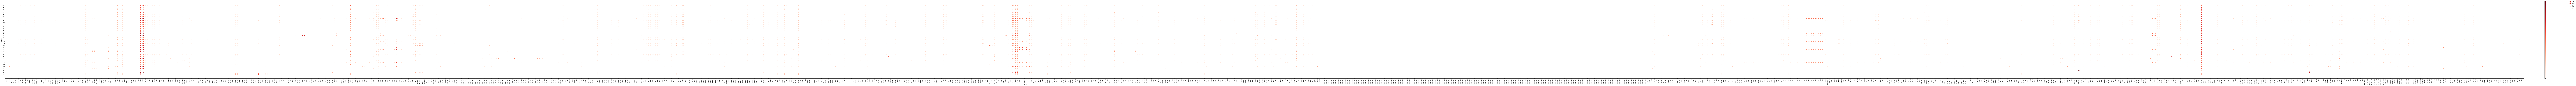

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[381.84999999999997, 0, 0.2, 0.5, 0.25])

In [43]:
#Plotting the expression of all CellPhoneDB (CPDB) genes in our Rectum Dataset in a dotplot
sc.pl.dotplot(adata, common_genes, groupby='leiden')

#### Plotting all genes in seperate dot plots (alphabetical order, n = 75)

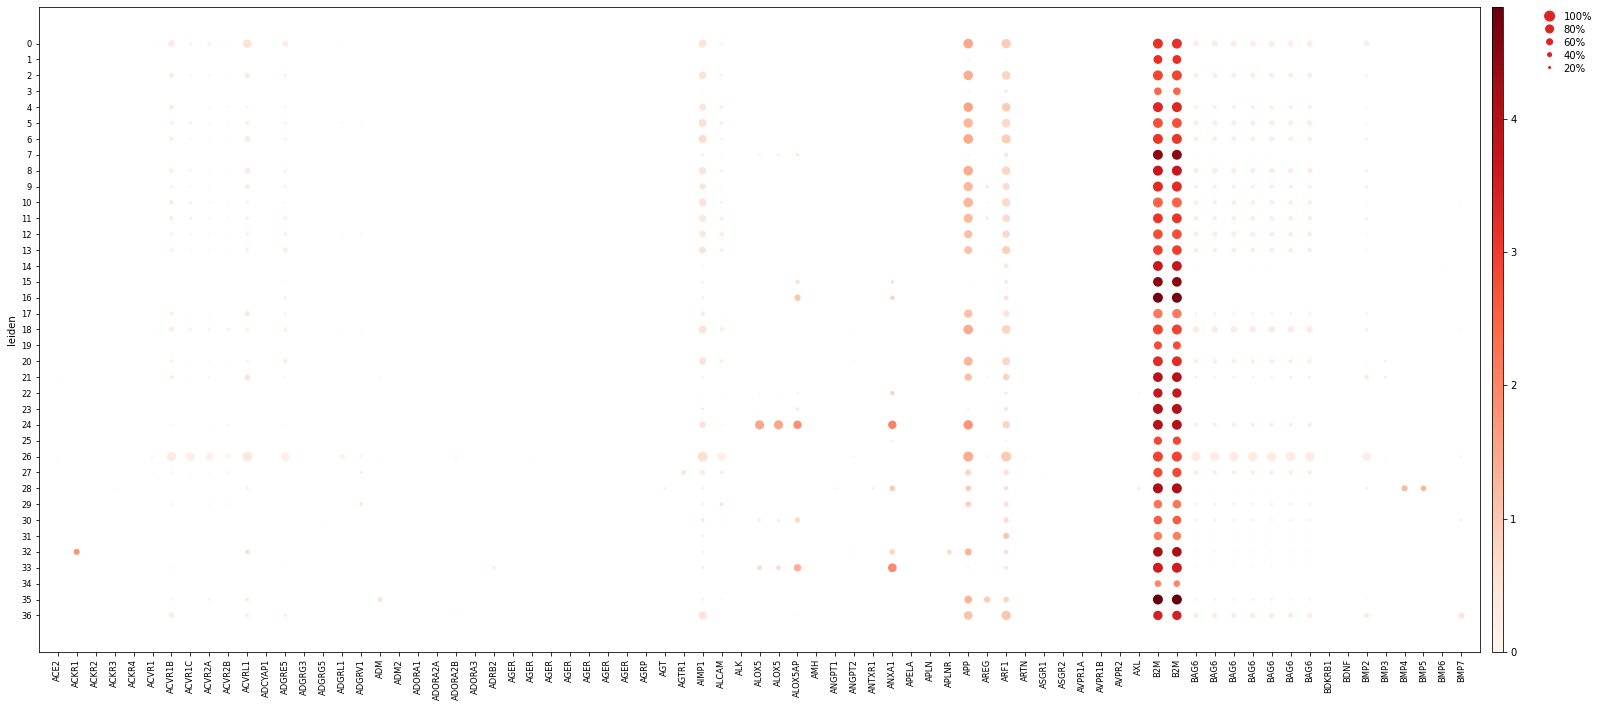

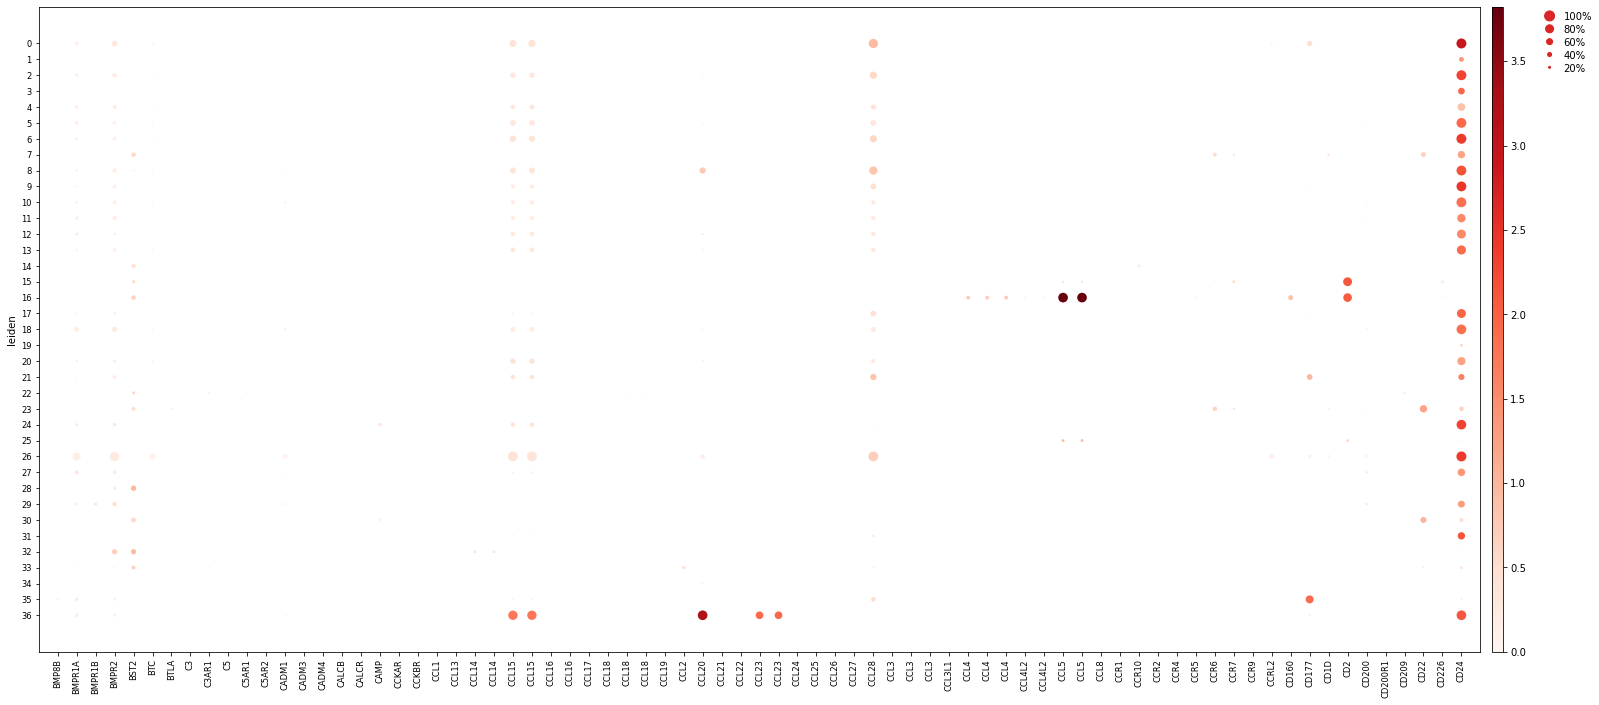

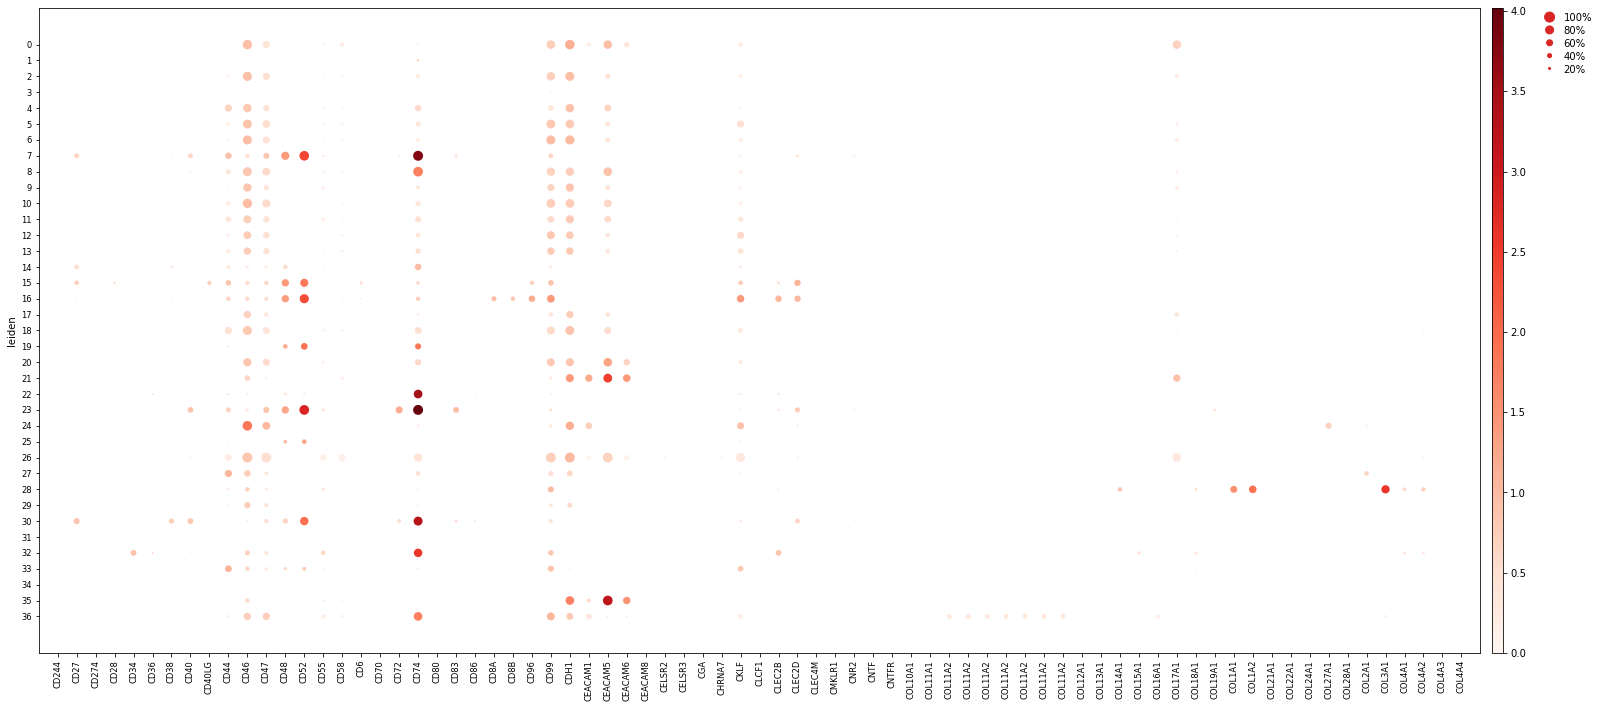

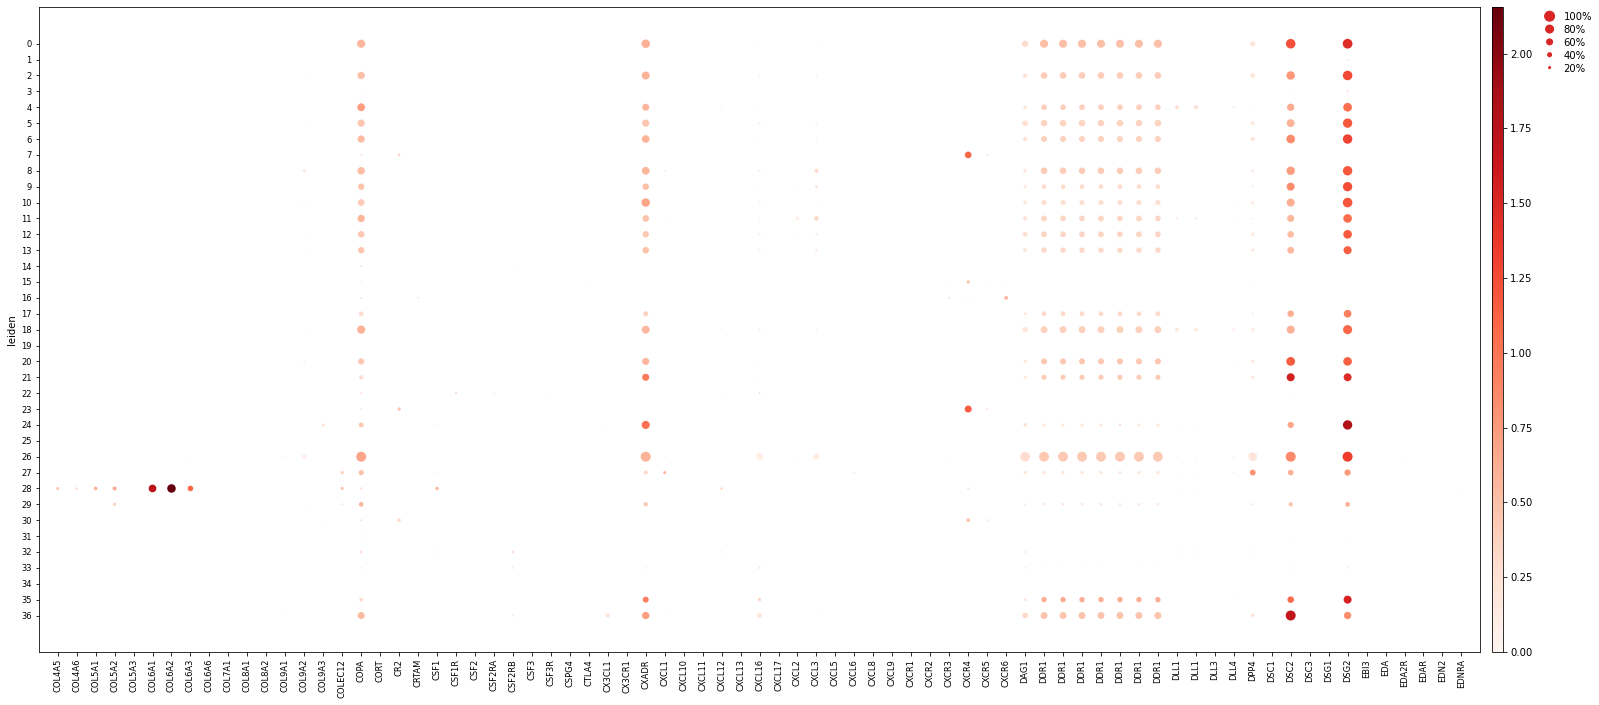

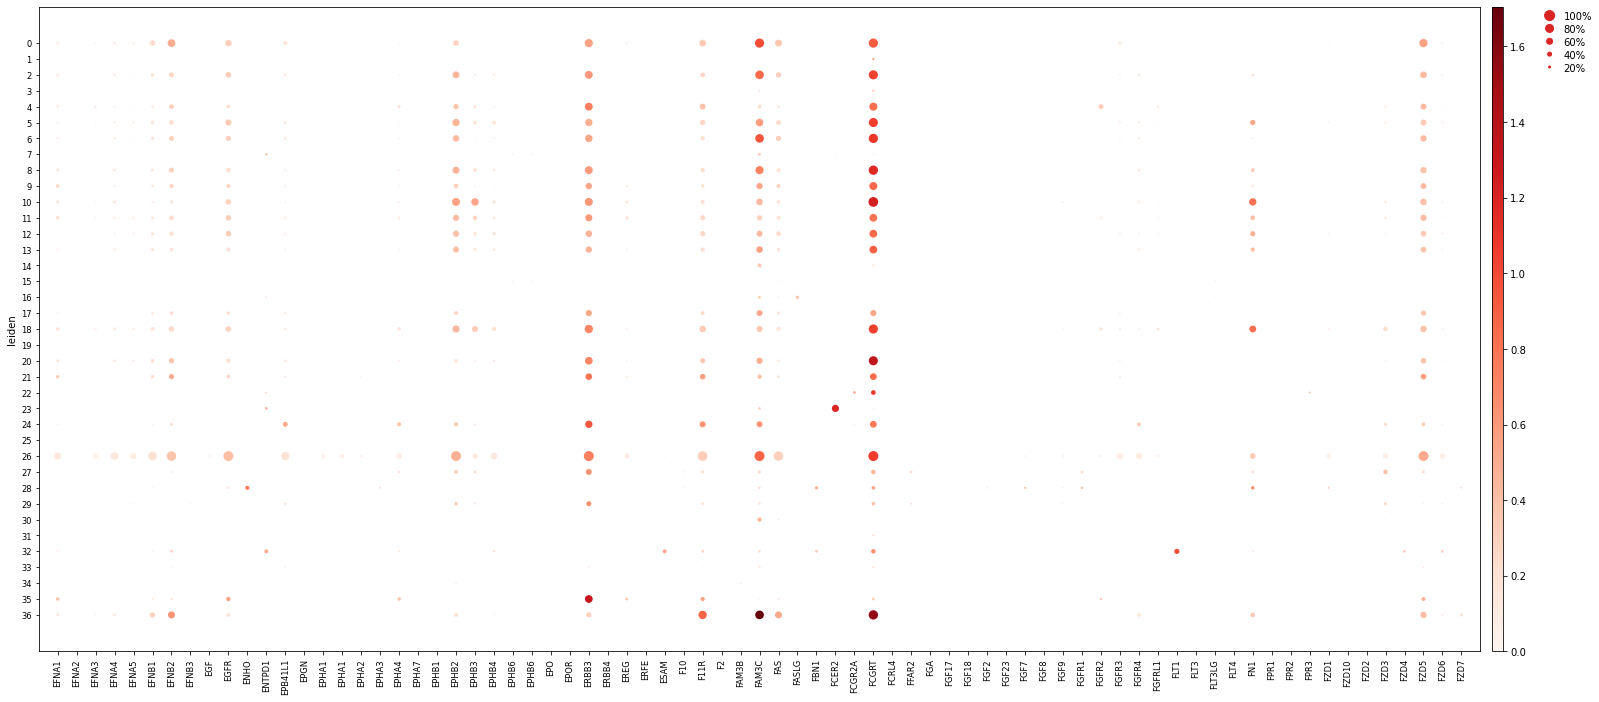

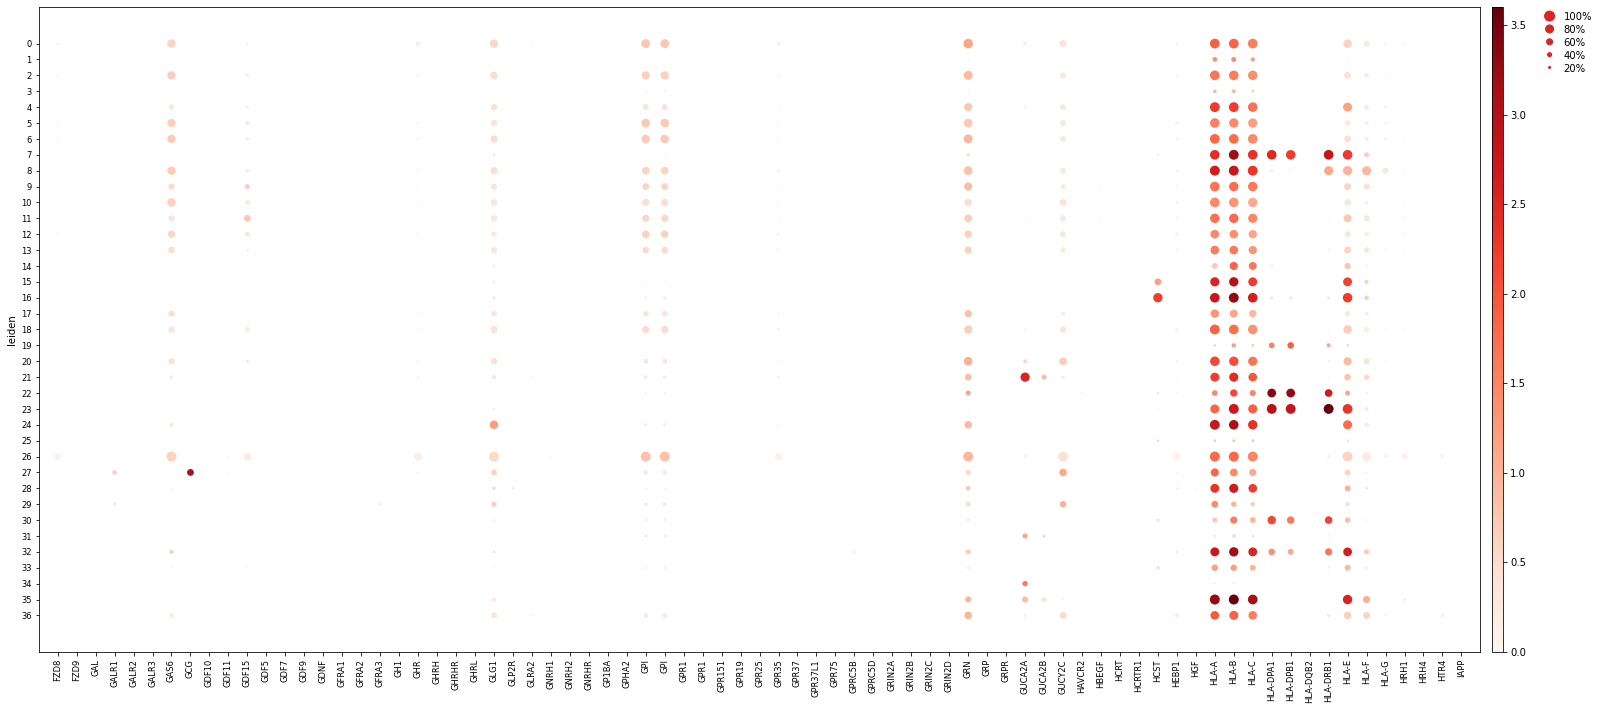

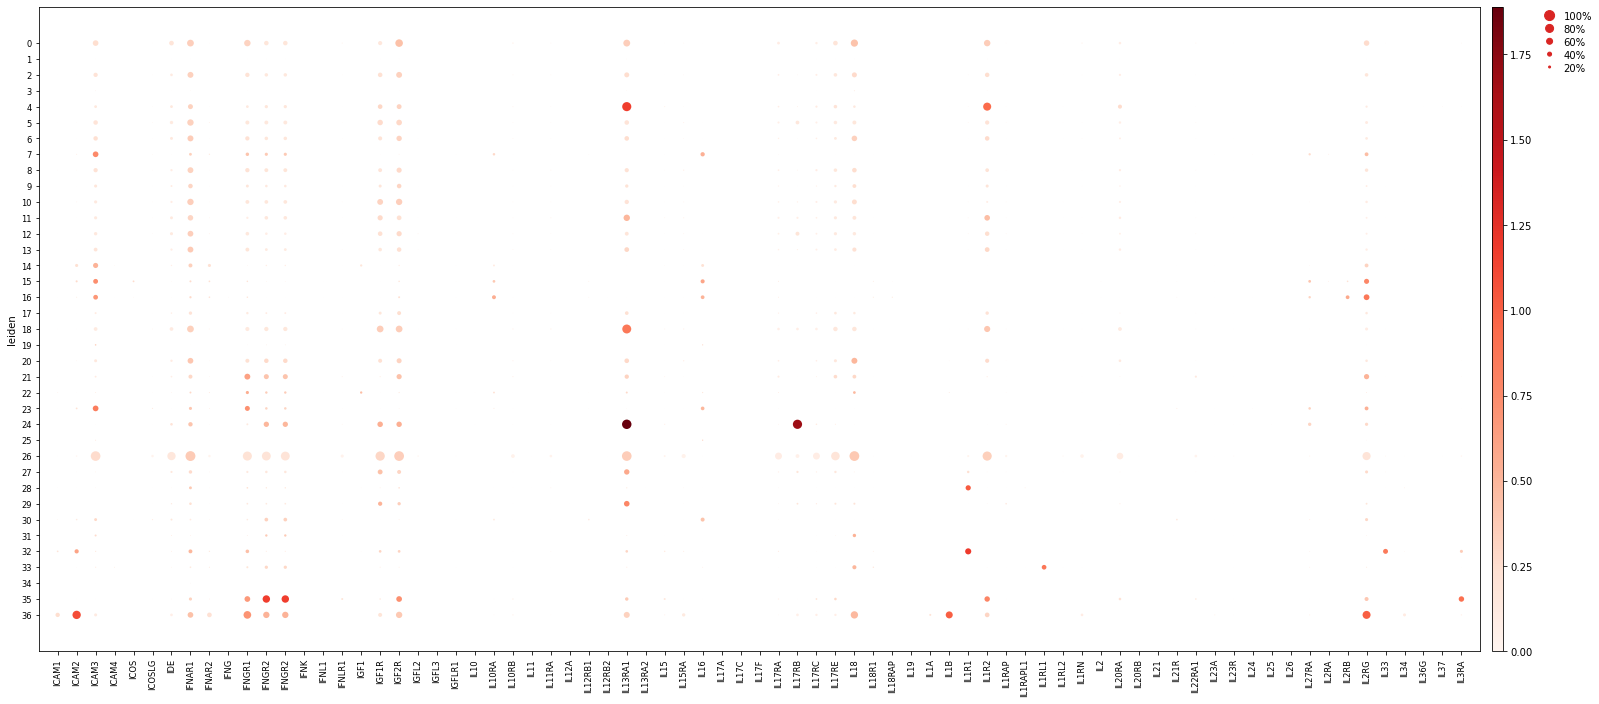

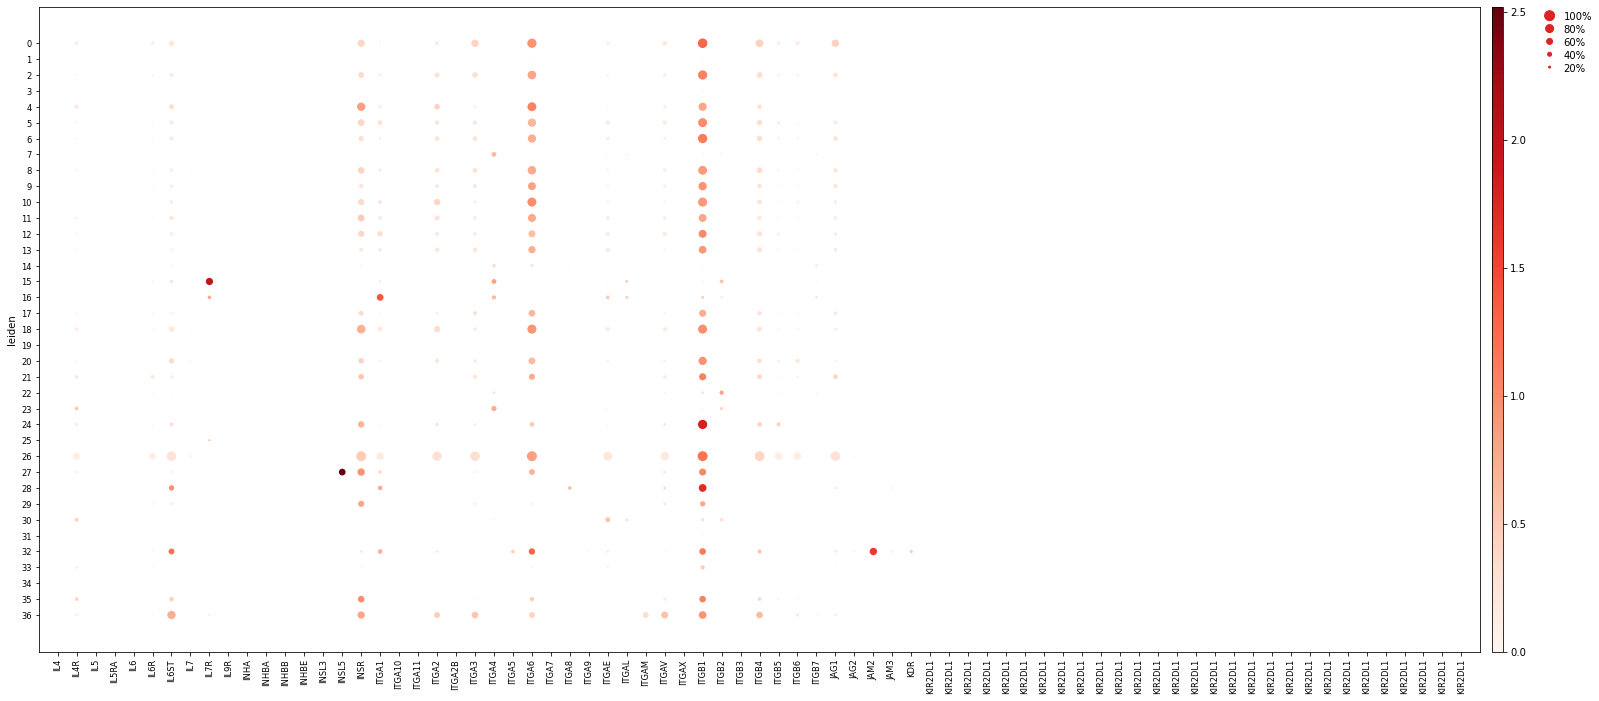

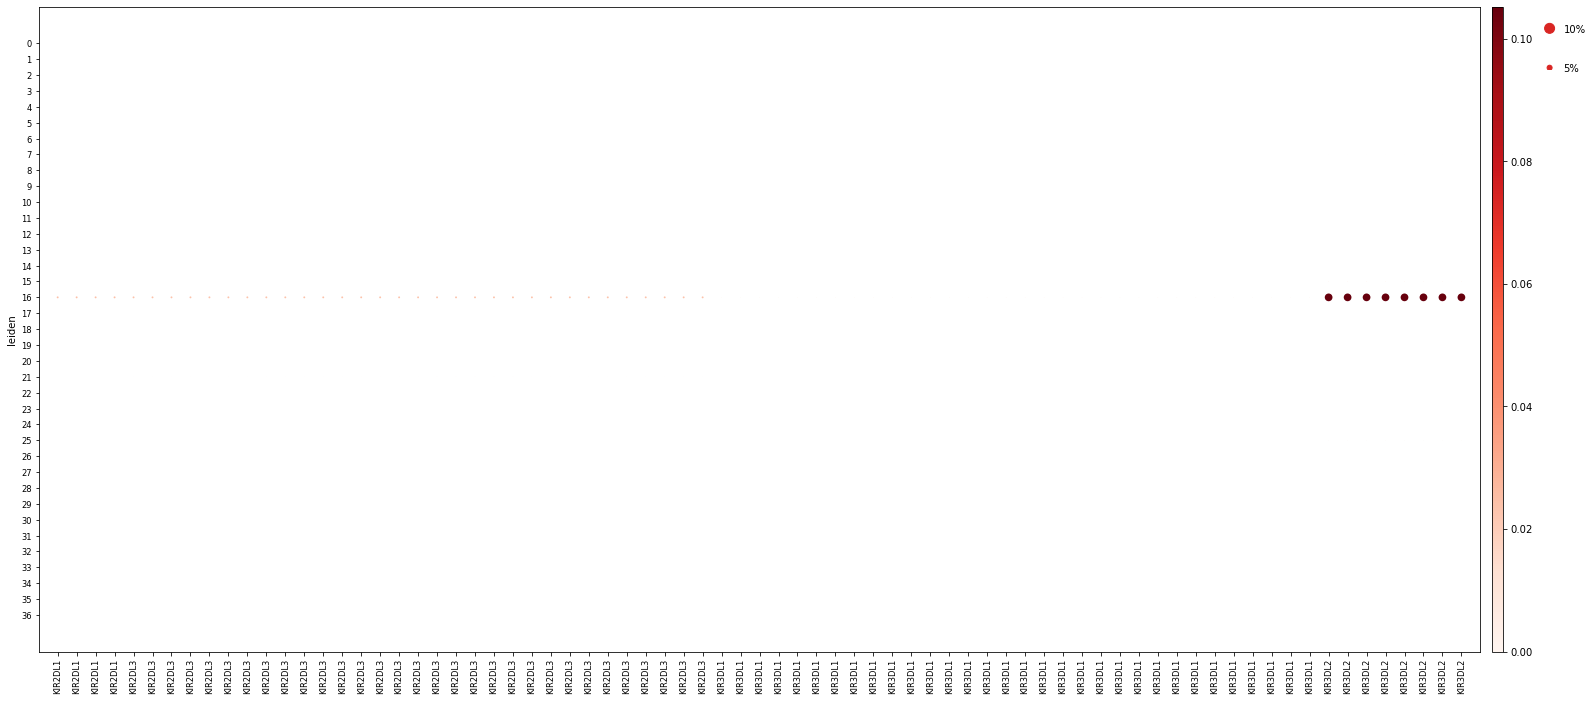

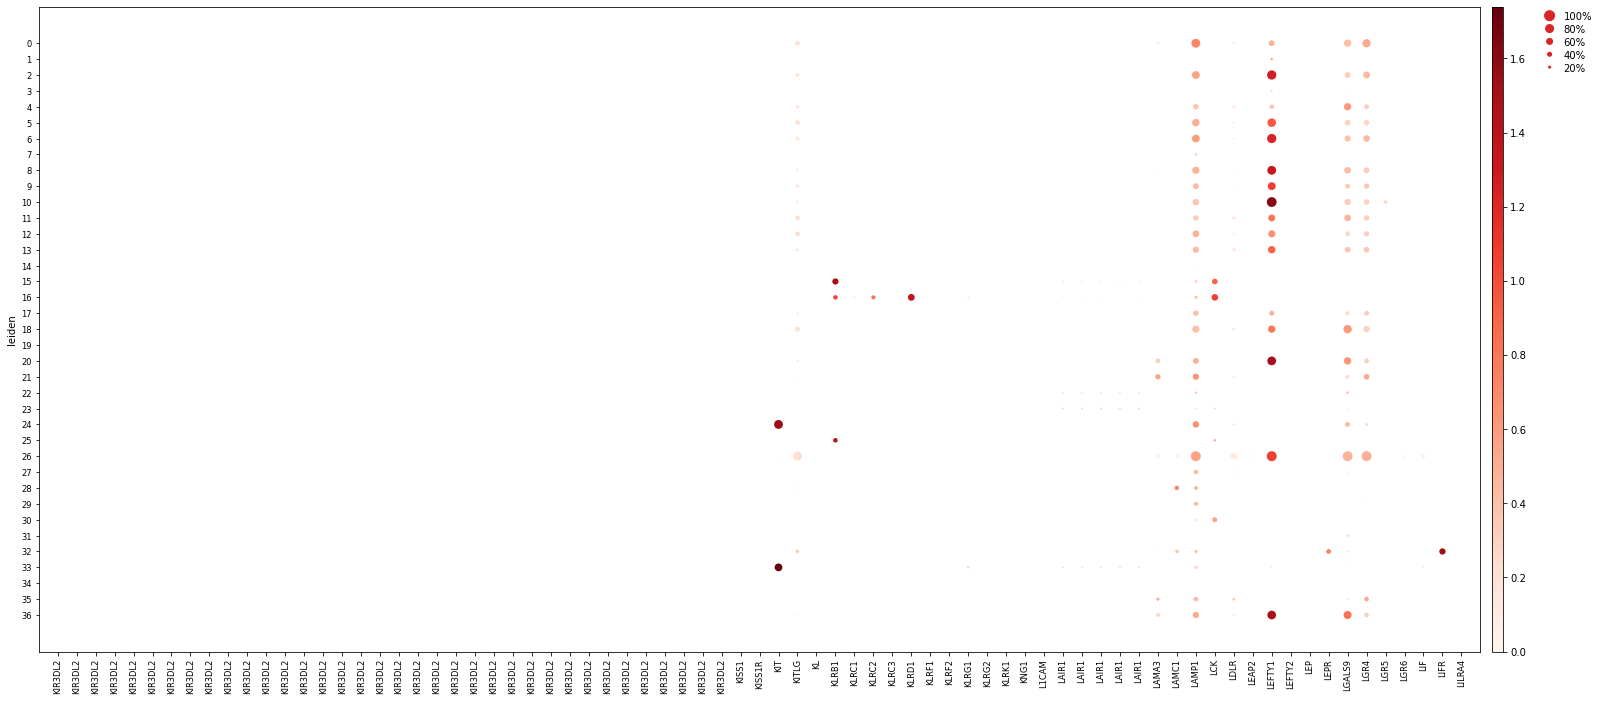

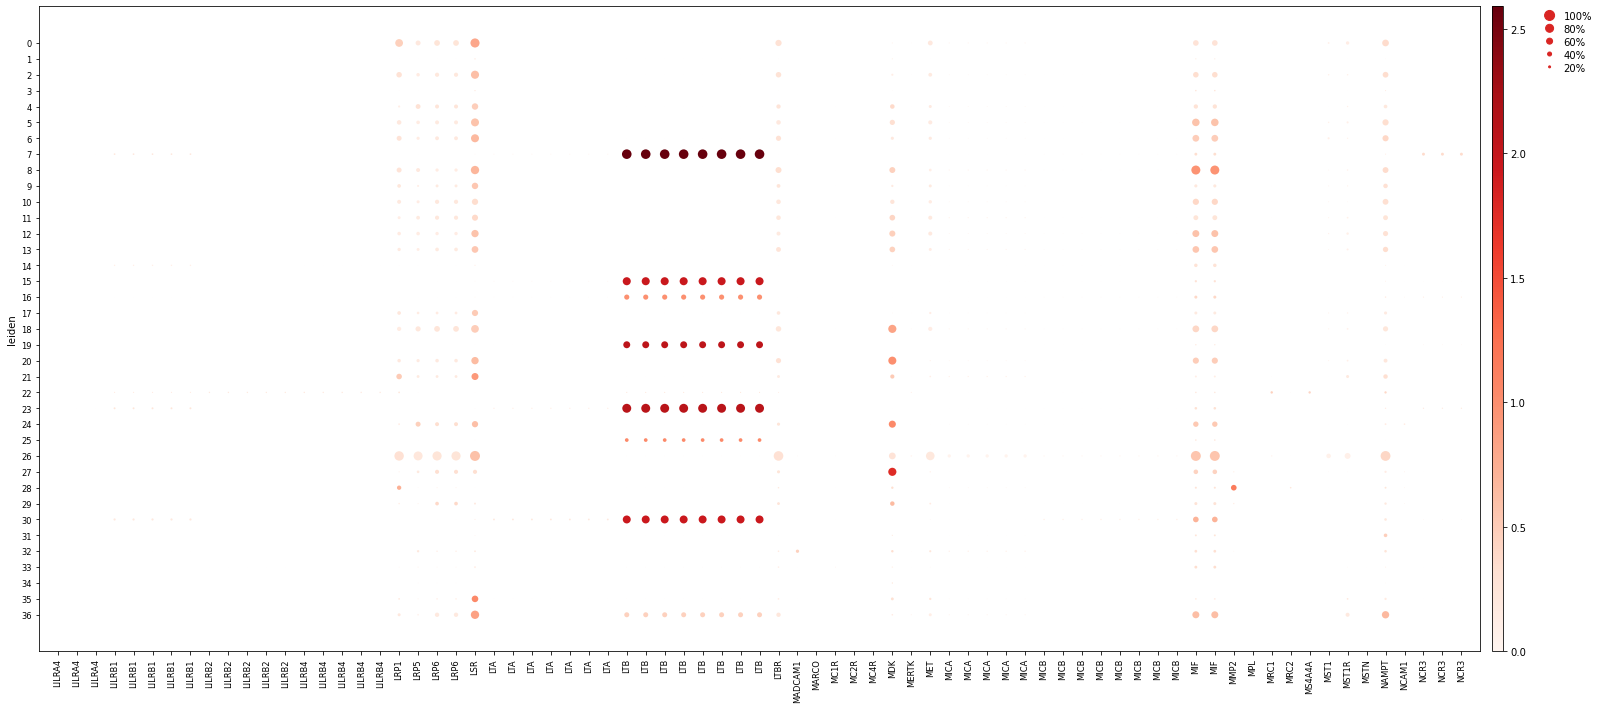

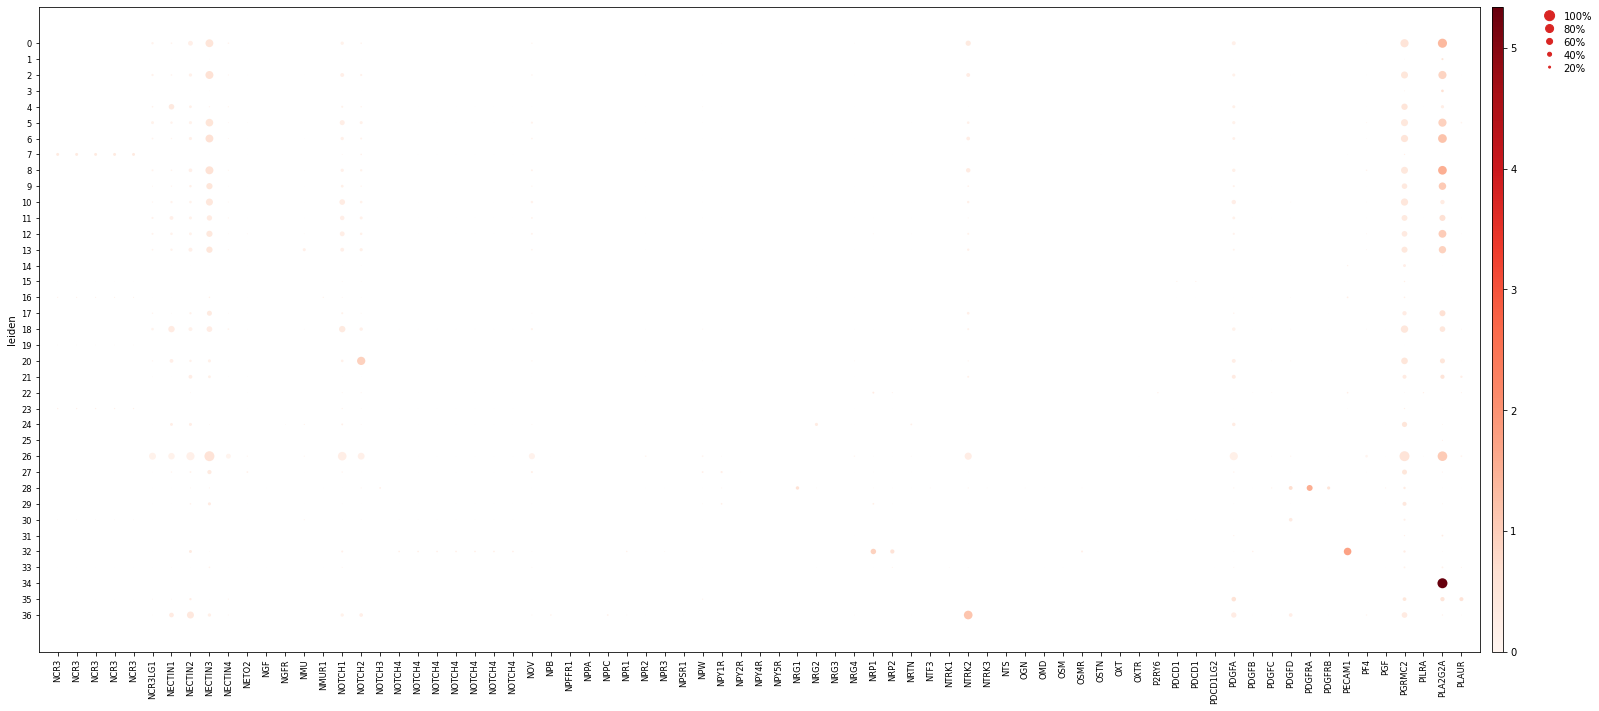

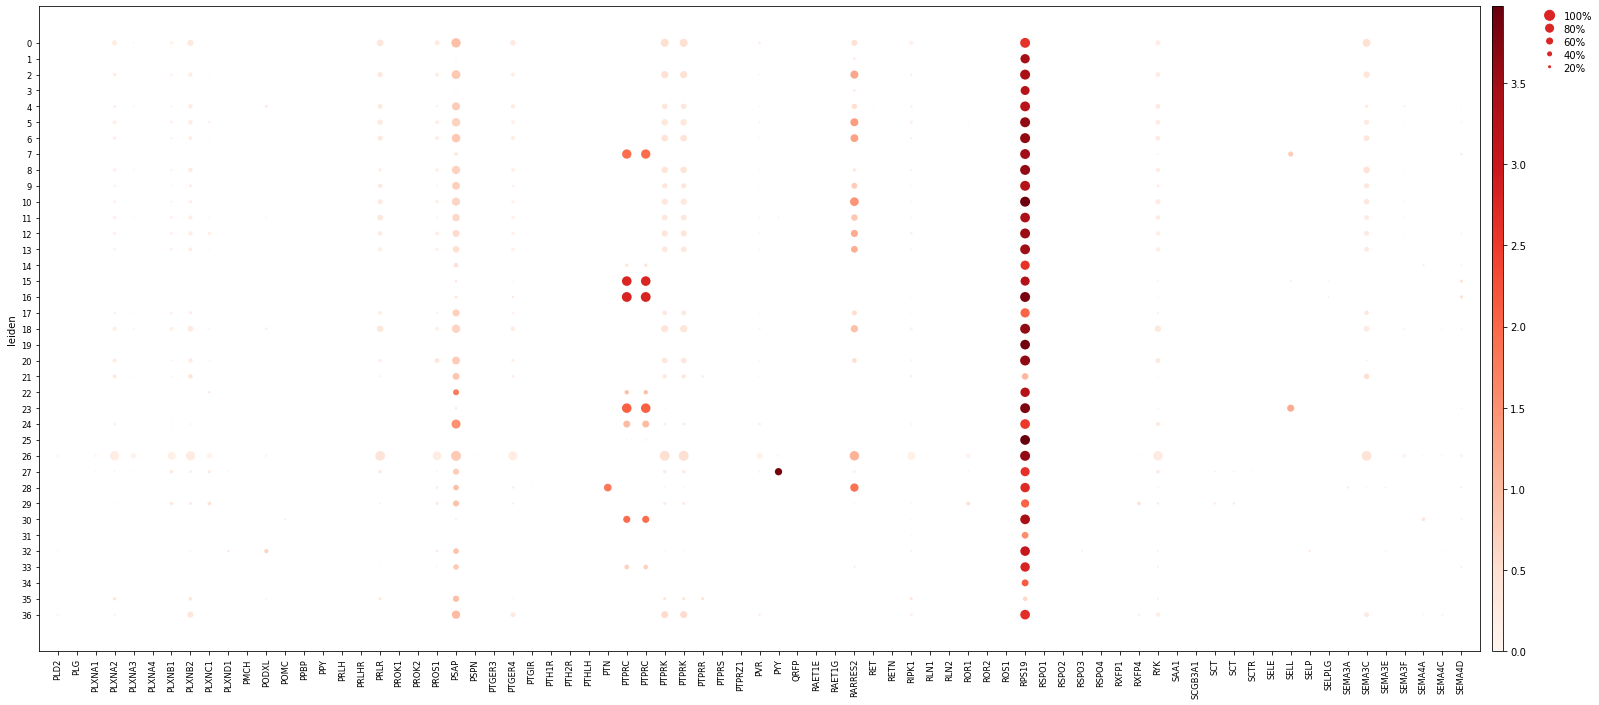

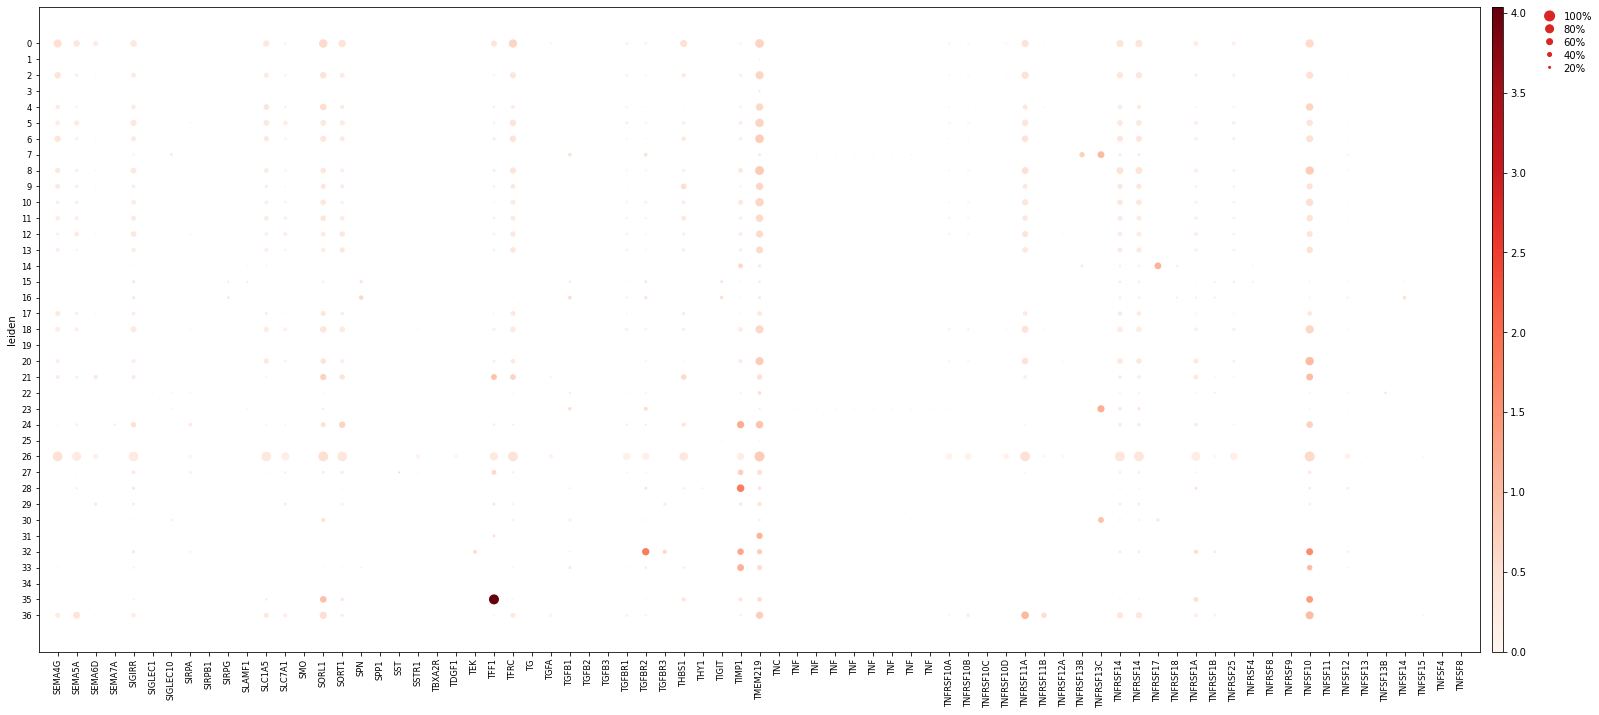

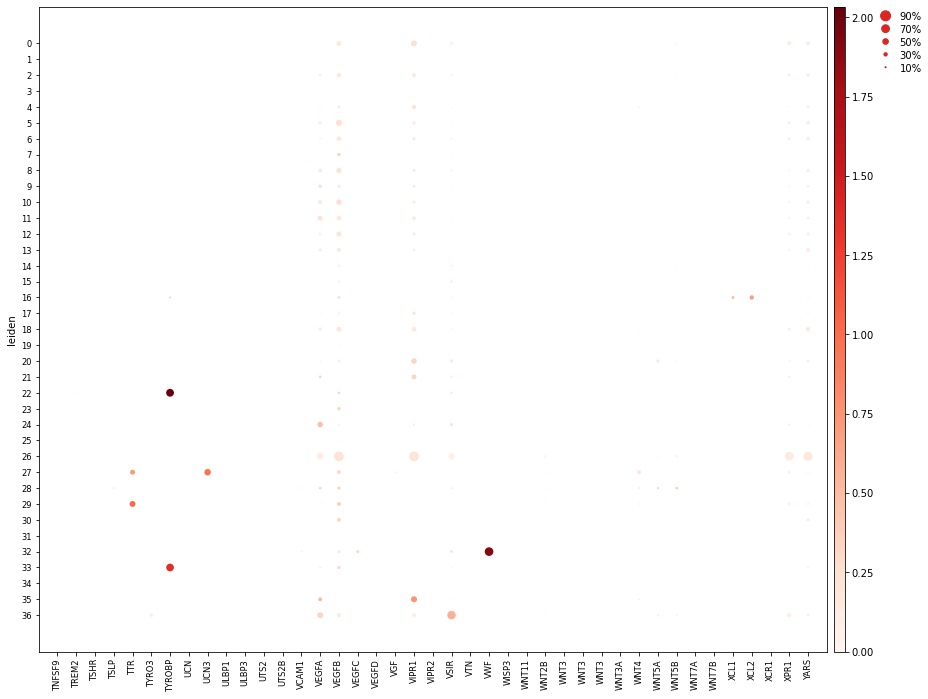

In [95]:
#Making a loop to generate dotplots of all common genes in groups of 75 for better visualization
for i in range(0, len(common_genes), 75):
    slc = common_genes.iloc[i : i + 75]
    sc.pl.dotplot(adata, slc, groupby='leiden')

# Exploring which genes are missing in our rectum data

In [285]:
print('There are ', missing_genes.shape[0], 'missing genes')
missing_proteins = pd.DataFrame(protein_input[protein_input['uniprot'].isin(gene_input[gene_input['gene_name'].isin(missing_genes)]['uniprot'])])
print('This is equivalent to ', missing_proteins.shape[0], 'missing proteins')

#The nomanclature I am using is thus misleading. There are 161 missing transcripts (which map to x number of genes) and then 140 missing proteins

There are  161 missing genes
This is equivalent to  140 missing proteins


In [277]:
#Missing Receptor Categories
missing_proteins.groupby(['receptor_desc']).count()

uniprot  protein_name  transmembrane  peripheral  \
receptor_desc                                                                  
Chemokine_receptor CCR_add        2             2              2           2   
KIR_add                           1             1              1           1   

                            secreted  secreted_desc  secreted_highlight  \
receptor_desc                                                             
Chemokine_receptor CCR_add         2              0                   2   
KIR_add                            1              0                   1   

                            receptor  integrin  other  other_desc  tags  \
receptor_desc                                                             
Chemokine_receptor CCR_add         2         2      2           0     2   
KIR_add                            1         1      1           0     1   

                            tags_reason  tags_description  pfam  
receptor_desc                                                    
Chemokine_receptor CCR_add            0                 0     2  
KIR_add                               0                 0     1

In [278]:
#Missing Secreted Categories
missing_proteins.groupby(['secreted_desc']).count()

uniprot  protein_name  transmembrane  peripheral  \
secreted_desc                                                               
CellSignal_WNT                 2             2              2           2   
Cytokine                      32            32             32          32   
Cytokine | Hormone             1             1              1           1   
Growthfactor                   9             9              9           9   
Growthfactor | Cytokine       10            10             10          10   
Growthfactor | Hormone         2             2              2           2   
Hormone                       23            23             23          23   
cytokine                       1             1              1           1   

                         secreted  secreted_highlight  receptor  \
secreted_desc                                                     
CellSignal_WNT                  2                   2         2   
Cytokine                       32                  32        32   
Cytokine | Hormone              1                   1         1   
Growthfactor                    9                   9         9   
Growthfactor | Cytokine        10                  10        10   
Growthfactor | Hormone          2                   2         2   
Hormone                        23                  23        23   
cytokine                        1                   1         1   

                         receptor_desc  integrin  other  other_desc  tags  \
secreted_desc                                                               
CellSignal_WNT                       0         2      2           0     2   
Cytokine                             0        32     32           0    32   
Cytokine | Hormone                   0         1      1           0     1   
Growthfactor                         0         9      9           0     9   
Growthfactor | Cytokine              0        10     10           0    10   
Growthfactor | Hormone               0         2      2           0     2   
Hormone                              0        23     23           0    23   
cytokine                             0         1      1           0     1   

                         tags_reason  tags_description  pfam  
secreted_desc                                                 
CellSignal_WNT                     0                 0     2  
Cytokine                           1                 1    30  
Cytokine | Hormone                 0                 0     1  
Growthfactor                       0                 0     9  
Growthfactor | Cytokine            0                 0     9  
Growthfactor | Hormone             0                 0     2  
Hormone                            0                 0    23  
cytokine                           0                 1     0

In [279]:
#Missing Integrins (none)
missing_proteins.groupby(['integrin']).count()

uniprot  protein_name  transmembrane  peripheral  secreted  \
integrin                                                               
False         140           140            140         140       140   

          secreted_desc  secreted_highlight  receptor  receptor_desc  other  \
integrin                                                                      
False                80                 140       140              3    140   

          other_desc  tags  tags_reason  tags_description  pfam  
integrin                                                         
False              0   140            5                11   133

In [281]:
#Missing Cytokines   **** this could be biological - we are not seeing IFNs because there is no inflammation!
missing_proteins[missing_proteins['secreted_highlight']]

uniprot protein_name  transmembrane  peripheral  secreted  \
52   O15520  FGF10_HUMAN          False       False      True   
93   O95393  BMP10_HUMAN          False       False      True   
97   O95750  FGF19_HUMAN          False       False      True   
100  O95813   CER1_HUMAN          False       False      True   
103  O95972  BMP15_HUMAN          False       False      True   
123  P01185   NEU2_HUMAN          False       False      True   
127  P01222   TSHB_HUMAN          False       False      True   
128  P01225   FSHB_HUMAN          False       False      True   
129  P01229   LSHB_HUMAN          False       False      True   
130  P01236    PRL_HUMAN          False       False      True   
132  P01242   SOM2_HUMAN          False       False      True   
133  P01258   CALC_HUMAN          False       False      True   
135  P01270   PTHY_HUMAN          False       False      True   
137  P01282    VIP_HUMAN          False       False      True   
140  P01308    INS_HUMAN          False       False      True   
141  P01344   IGF2_HUMAN          False       False      True   
142  P01350   GAST_HUMAN          False       False      True   
145  P01562  IFNA1_HUMAN          False       False      True   
146  P01563  IFNA2_HUMAN          False       False      True   
147  P01566  IFN10_HUMAN          False       False      True   
148  P01567  IFNA7_HUMAN          False       False      True   
149  P01568  IFN21_HUMAN          False       False      True   
150  P01569  IFNA5_HUMAN          False       False      True   
151  P01570  IFN14_HUMAN          False       False      True   
152  P01571  IFN17_HUMAN          False       False      True   
153  P01574   IFNB_HUMAN          False       False      True   
184  P04628   WNT1_HUMAN          False       False      True   
187  P05000  IFNW1_HUMAN          False       False      True   
188  P05013  IFNA6_HUMAN          False       False      True   
189  P05014  IFNA4_HUMAN          False       False      True   
..      ...          ...            ...         ...       ...   
465  P34130   NTF4_HUMAN          False       False      True   
471  P35225   IL13_HUMAN          False       False      True   
497  P40225    TPO_HUMAN          False       False      True   
557  P51671  CCL11_HUMAN          False       False      True   
578  P55000  SLUR1_HUMAN          False       False      True   
581  P55103  INHBC_HUMAN          False       False      True   
611  P80098   CCL7_HUMAN          False       False      True   
691  Q14406   CSHL_HUMAN          False       False      True   
715  Q15848  ADIPO_HUMAN          False       False      True   
744  Q6KF10   GDF6_HUMAN          False       False      True   
747  Q6UW32  IGFL1_HUMAN          False       False      True   
752  Q6UX27  VSTM1_HUMAN           True       False      True   
763  Q7Z5Y6  BMP8A_HUMAN          False       False      True   
765  Q86WN2   IFNE_HUMAN          False       False      True   
773  Q8IZI9  IFNL3_HUMAN          False       False      True   
774  Q8IZJ0  IFNL2_HUMAN          False       False      True   
784  Q8NEV9  IL27A_HUMAN          False       False      True   
802  Q8WWZ1  IL1FA_HUMAN          False       False      True   
804  Q8WXF3   REL3_HUMAN          False       False      True   
839  Q96RP3   UCN2_HUMAN          False       False      True   
840  Q96S42  NODAL_HUMAN          False       False      True   
875  Q9GZX6   IL22_HUMAN          False       False      True   
910  Q9NR23   GDF3_HUMAN          False       False      True   
920  Q9NYY1   IL20_HUMAN          False       False      True   
925  Q9NZH7  IL36B_HUMAN          False       False      True   
935  Q9UBC7   GALP_HUMAN          False       False      True   
939  Q9UBH0  I36RA_HUMAN          False       False      True   
948  Q9UHA7  IL36A_HUMAN          False       False      True   
953  Q9UK05   GDF2_HUMAN          False       False      True   
965  Q9UNG2  TNF18_HUMAN           True

# Description of the protein_input

In [ ]:
# 3 non-exclusive cellular locations: transmembrane, peripheral, secreted. 
    # secreted_desc gives a discription (cytokines, hormones, Growthfactor, immune-related protein)
    # secreted_highlight = cytokines, hormones, growth factors and immune-related proteins only
# 2 receptor options: receptor or integrin
    # receptor_desc gives a discription of the receptor
    # integrins is manually curated  

# Subset the CPDB Genes to Transmembrane | Peripheral | Secreted | Secreted_highlight | integrin | receptor

There are 667 genes in  receptor
There are 605 receptor in common with Rectum


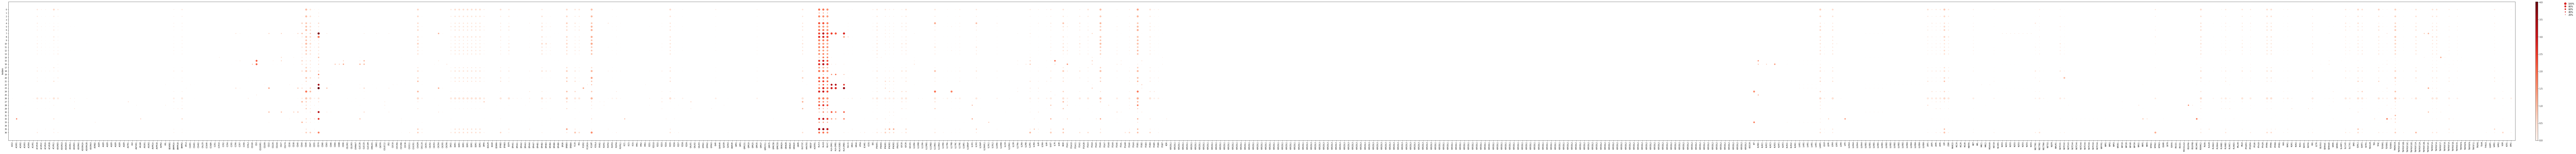

There are 0 genes in  integrin
There are 0 integrin in common with Rectum
There are 569 genes in  secreted
There are 461 secreted in common with Rectum


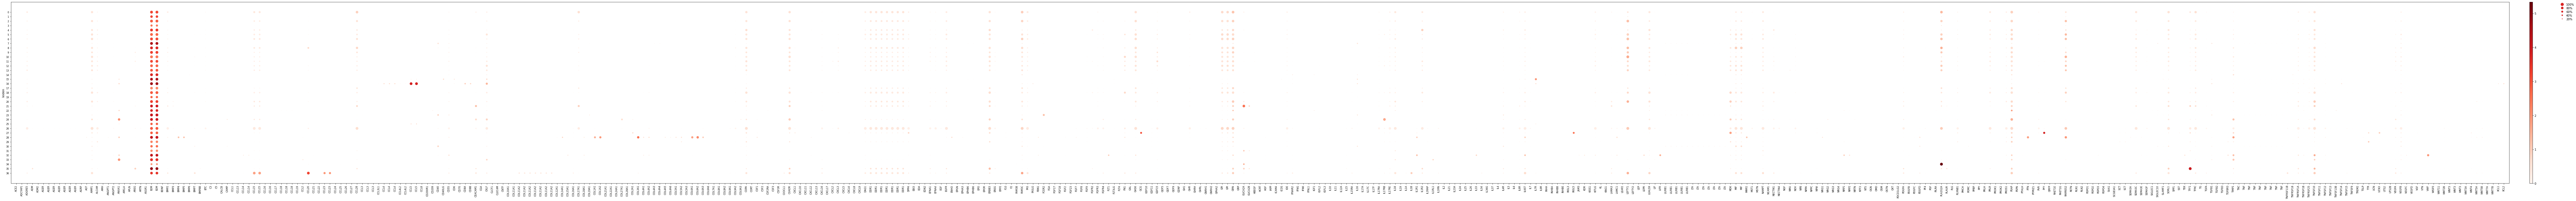

There are 811 genes in  transmembrane
There are 744 transmembrane in common with Rectum


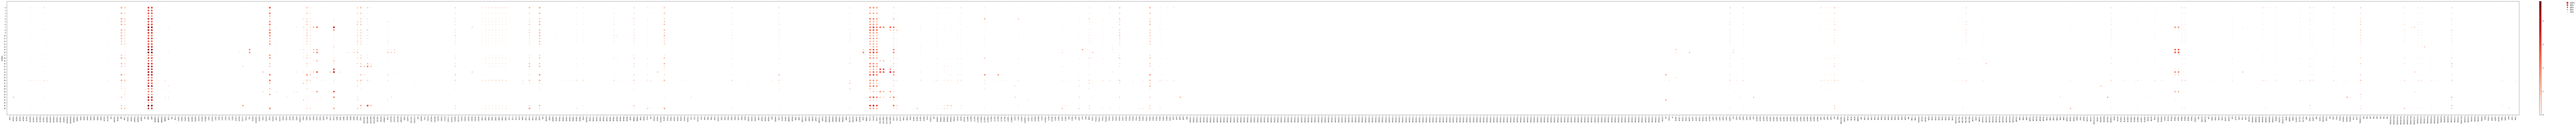

There are 20 genes in  peripheral
There are 20 peripheral in common with Rectum


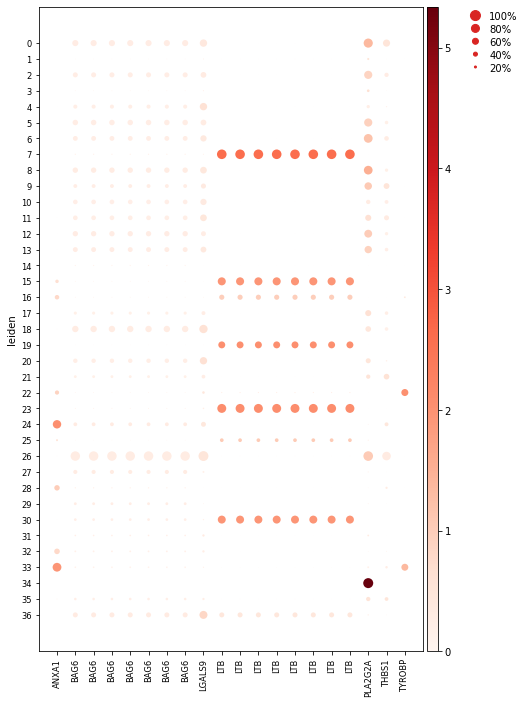

There are 370 genes in  secreted_highlight
There are 277 secreted_highlight in common with Rectum


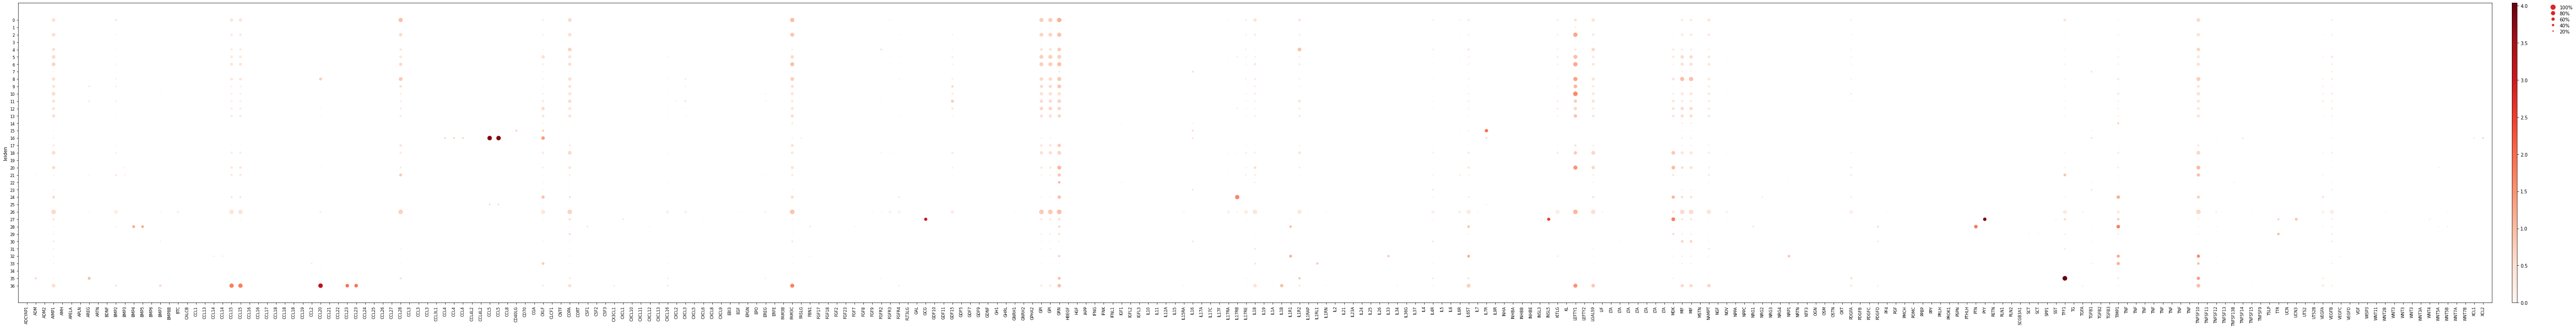

In [140]:
for type in ['receptor', 'integrin', 'secreted', 'transmembrane', 'peripheral', 'secreted_highlight']:
    genes = gene_input[gene_input['uniprot'].isin(protein_input[protein_input[type]]['uniprot'])]['gene_name']
    genes = pd.DataFrame(data= genes, columns = ['gene_name'])
    genes_common = genes[genes['gene_name'].isin(adata.var_names)]['gene_name']
    
    print('There are', genes.shape[0], 'genes in ', type)
    print('There are', genes_common.shape[0], type, 'in common with Rectum')
    
    if genes_common.shape[0] == 0:
        continue
    
    sc.pl.dotplot(adata, genes_common, groupby='leiden')

# Subset the CPDB Genes to Integrins

There are 27 genes in  secreted_highlight
There are 26 secreted_highlight in common with Rectum


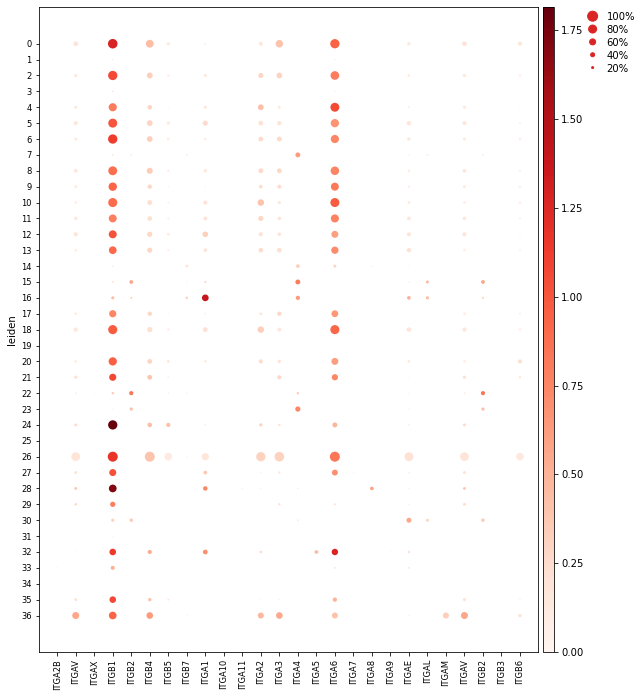

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[9.1, 0, 0.2, 0.5, 0.25])

In [236]:
#We need to do it seperately because all the integrins were annotated as False in the protein_input. We use the comple_input df

integrin_genes = list()

for column in range(1,5):
    genes = list(gene_input[gene_input['uniprot'].isin(complex_input[complex_input['integrin']].iloc[:,column])]['gene_name'])
    integrin_genes = integrin_genes + genes

integrin_genes = pd.DataFrame(data = integrin_genes, columns = ['gene_name'])
integrin_common = integrin_genes[integrin_genes['gene_name'].isin(adata.var_names)]['gene_name']
    
print('There are', integrin_genes.shape[0], 'genes in ', type)
print('There are', integrin_common.shape[0], type, 'in common with Rectum')

sc.pl.dotplot(adata, integrin_common, groupby='leiden')

# Subset the CPDB Genes to Secreted SubClassification

In [189]:
#Find all of the subgroups
secreted_groups = pd.DataFrame(protein_input.groupby(['secreted_desc']).count())
secreted_groups

uniprot  protein_name  transmembrane  peripheral  \
secreted_desc                                                               
CellSignal_WNT                11            11             11          11   
Cytokine                     128           128            128         128   
Cytokine | Hormone             1             1              1           1   
Cytokine_like                  1             1              1           1   
Growthfactor                  65            65             65          65   
Growthfactor | Cytokine       43            43             43          43   
Growthfactor | Hormone         6             6              6           6   
Hormone                       67            67             67          67   
Immune-related                 1             1              1           1   
cytokine                       4             4              4           4   

                         secreted  secreted_highlight  receptor  \
secreted_desc                                                     
CellSignal_WNT                 11                  11        11   
Cytokine                      128                 128       128   
Cytokine | Hormone              1                   1         1   
Cytokine_like                   1                   1         1   
Growthfactor                   65                  65        65   
Growthfactor | Cytokine        43                  43        43   
Growthfactor | Hormone          6                   6         6   
Hormone                        67                  67        67   
Immune-related                  1                   1         1   
cytokine                        4                   4         4   

                         receptor_desc  integrin  other  other_desc  tags  \
secreted_desc                                                               
CellSignal_WNT                       0        11     11           0    11   
Cytokine                            15       128    128           0   128   
Cytokine | Hormone                   0         1      1           0     1   
Cytokine_like                        0         1      1           0     1   
Growthfactor                         0        65     65           0    65   
Growthfactor | Cytokine              0        43     43           0    43   
Growthfactor | Hormone               0         6      6           0     6   
Hormone                              0        67     67           0    67   
Immune-related                       0         1      1           0     1   
cytokine                             0         4      4           0     4   

                         tags_reason  tags_description  pfam  
secreted_desc                                                 
CellSignal_WNT                     0                 0    11  
Cytokine                           2                 4   120  
Cytokine | Hormone                 0                 0     1  
Cytokine_like                      0                 0     1  
Growthfactor                       4                 5    58  
Growthfactor | Cytokine            1                 1    41  
Growthfactor | Hormone             0                 0     6  
Hormone                            0                 0    64  
Immune-related                     1                 1     1  
cytokine                           0                 4     3

There are 13 genes in  CellSignal_WNT
There are 11 CellSignal_WNT in common with Rectum


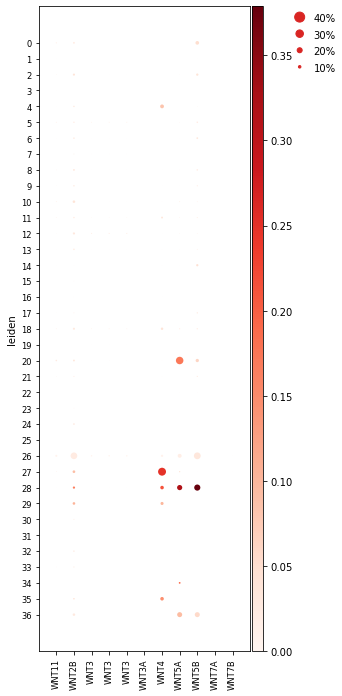

There are 167 genes in  Cytokine
There are 123 Cytokine in common with Rectum


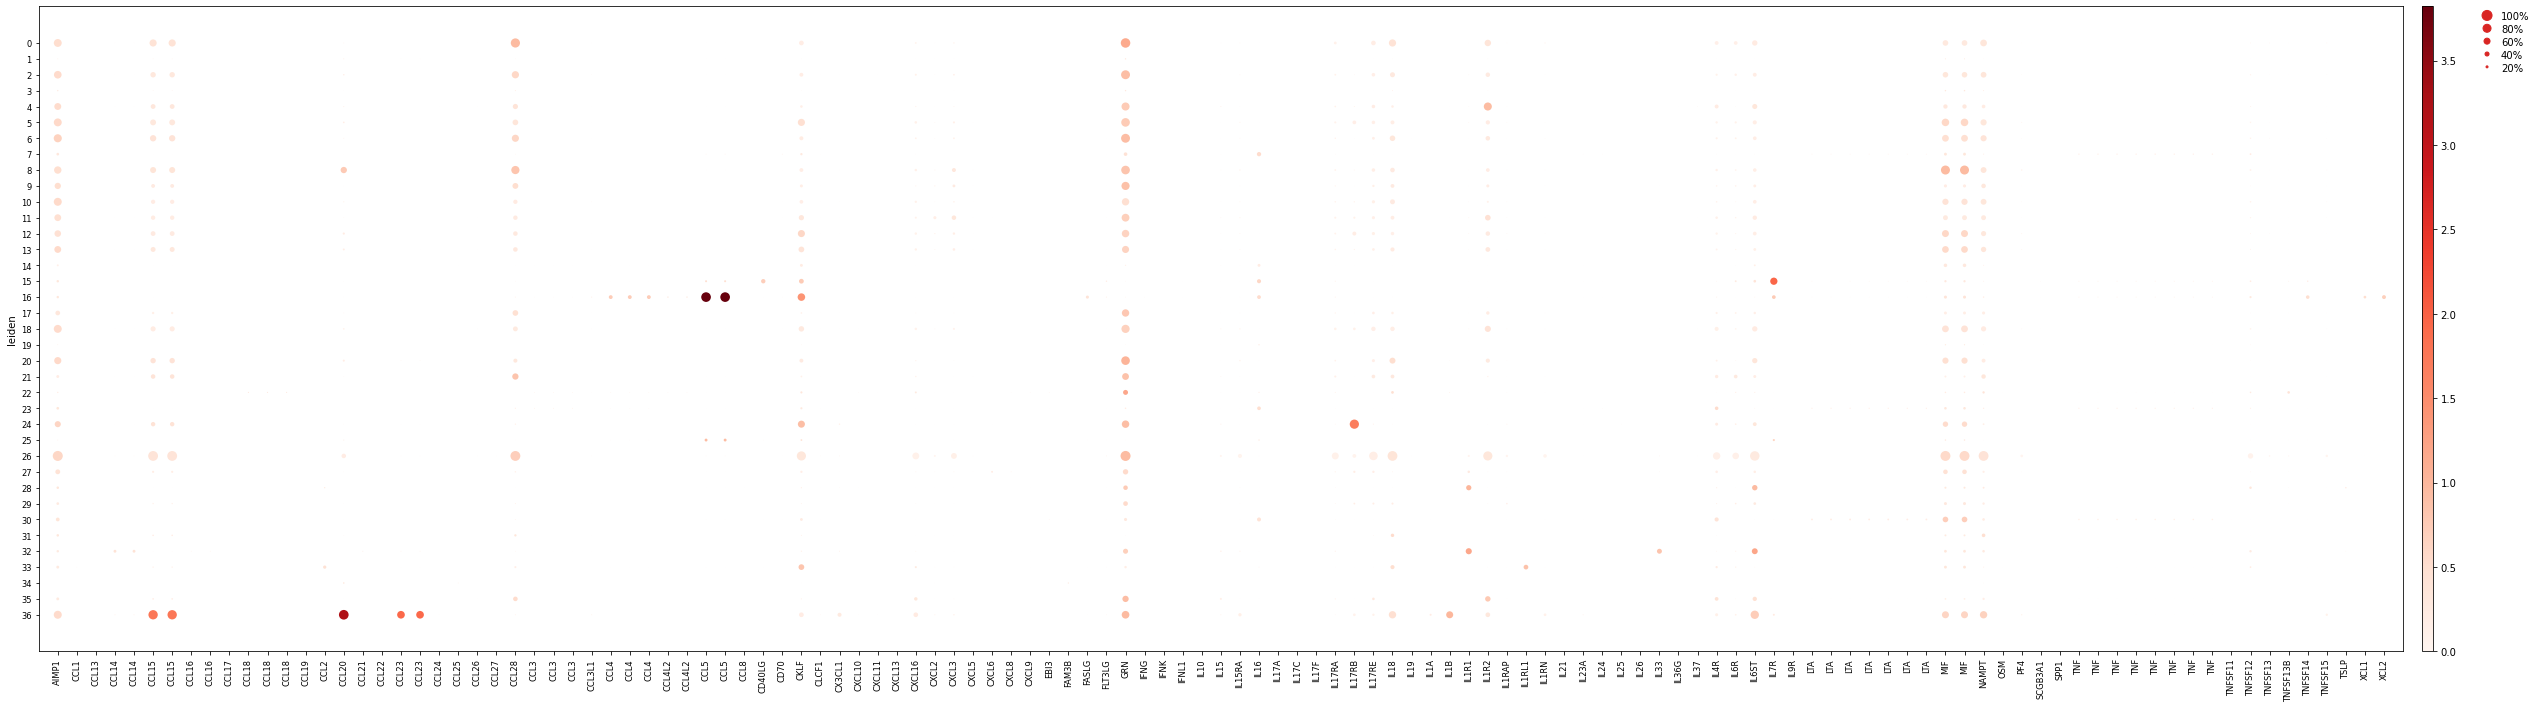

There are 1 genes in  Cytokine | Hormone
There are 0 Cytokine | Hormone in common with Rectum
There are 1 genes in  Cytokine_like
There are 1 Cytokine_like in common with Rectum


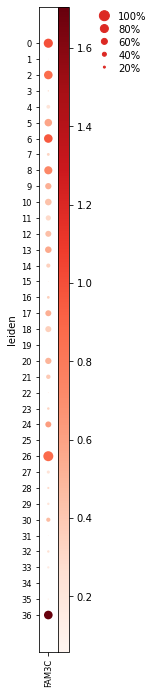

There are 65 genes in  Growthfactor
There are 56 Growthfactor in common with Rectum


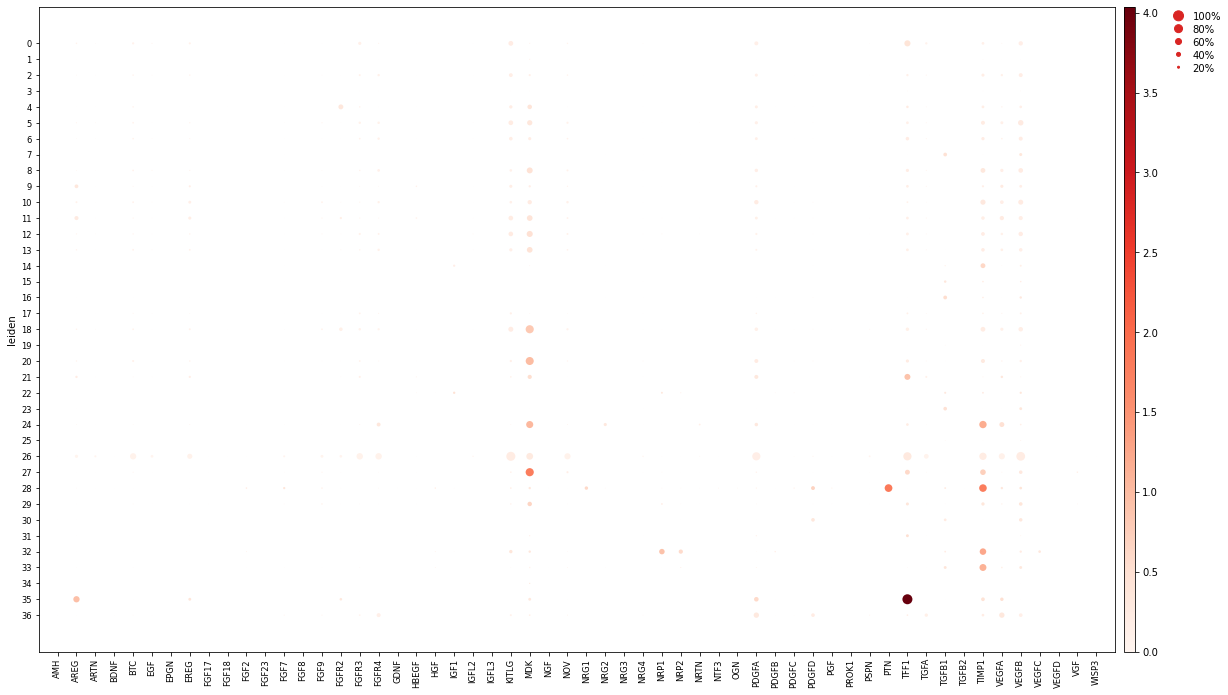

There are 44 genes in  Growthfactor | Cytokine
There are 34 Growthfactor | Cytokine in common with Rectum


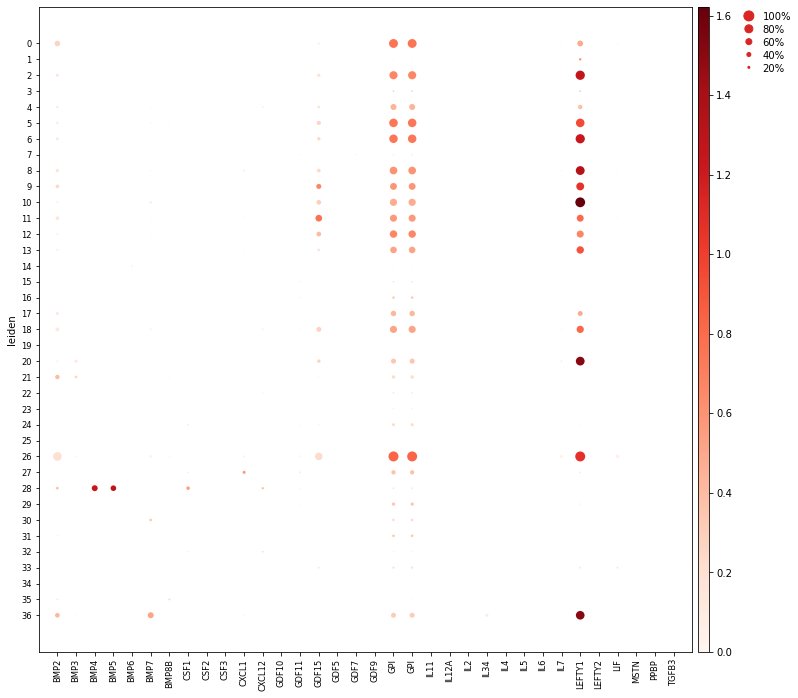

There are 7 genes in  Growthfactor | Hormone
There are 4 Growthfactor | Hormone in common with Rectum


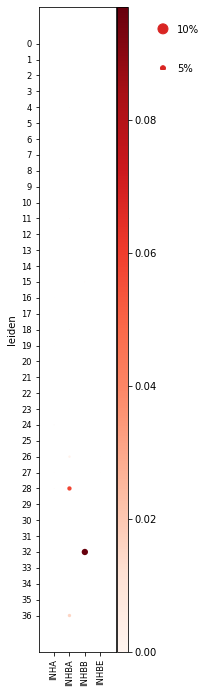

There are 68 genes in  Hormone
There are 45 Hormone in common with Rectum


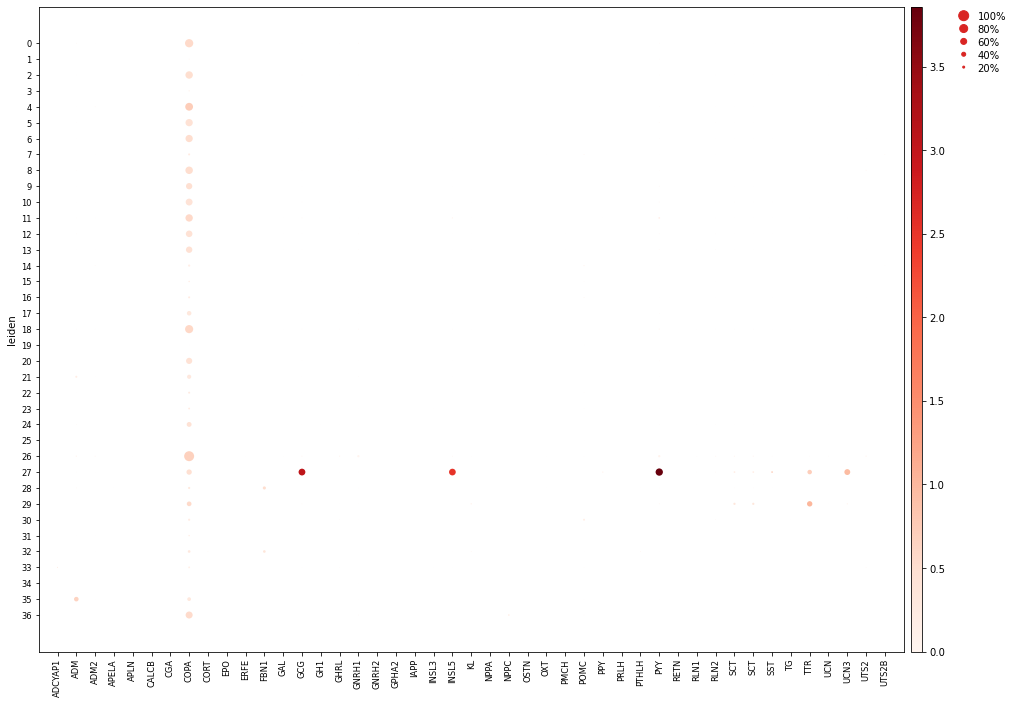

There are 1 genes in  Immune-related
There are 1 Immune-related in common with Rectum


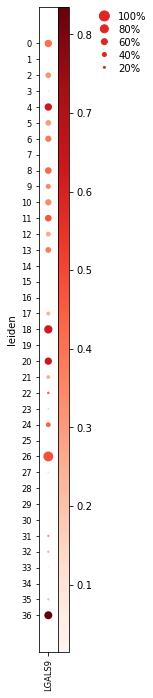

There are 4 genes in  cytokine
There are 3 cytokine in common with Rectum


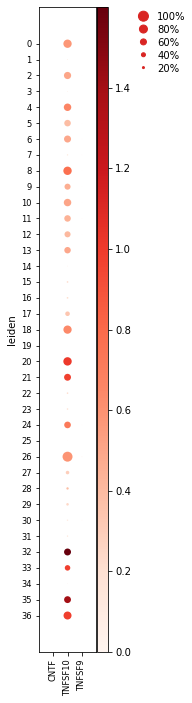

In [191]:
#Loop through the groups to generate dotplots

for index, row in secreted_groups.iterrows():
    
    genes = gene_input[gene_input['uniprot'].isin(protein_input.loc[protein_input['secreted_desc'] == index]['uniprot'])]['gene_name']
    genes = pd.DataFrame(data= genes, columns = ['gene_name'])
    genes_common = genes[genes['gene_name'].isin(adata.var_names)]['gene_name']

    print('There are', genes.shape[0], 'genes in ', index)
    print('There are', genes_common.shape[0], index, 'in common with Rectum')
    
    if genes_common.shape[0] == 0:
        continue
        
    sc.pl.dotplot(adata, genes_common, groupby='leiden')

# Subset the CPDB Genes to Receptor SubClassifications

In [188]:
#Find all of the subgroups
receptor_groups = pd.DataFrame(protein_input.groupby(['receptor_desc']).count())
receptor_groups

uniprot  protein_name  transmembrane  \
receptor_desc                                                            
Artipical_chemokine_receptor_add        1             1              1   
Atipical_chemokine_receptor_add         4             4              4   
Chemokine_receptor CCR_add             10            10             10   
Chemokine_receptor CXCR_add             6             6              6   
Chemokine_receptor XC_add               1             1              1   
Chemokine_receptor_CX3CR1_add           1             1              1   
Chemokine_receptor_add                  3             3              3   
Cytokine_receptor                      15            15             15   
Cytokine_receptor_add                  31            31             31   
Cytokine_receptor_add IL6 family        1             1              1   
Estrogen_receptor_add                   1             1              1   
HLA                                     7             7              7   
Hormone_receptor_add                    2             2              2   
Inflammation                            1             1              1   
Inhibitory LILRs_add                    3             3              3   
Interferon_receptor                     1             1              1   
Interferon_receptor_add                 4             4              4   
KIR_add                                 5             5              5   
KLR_add                                10            10             10   
TGFBeta_receptor_add                    5             5              5   
TNF_receptor_add                       23            23             23   
cytokine_receptor_add                   1             1              1   
growth factor receptor                  1             1              1   

                                  peripheral  secreted  secreted_desc  \
receptor_desc                                                           
Artipical_chemokine_receptor_add           1         1              0   
Atipical_chemokine_receptor_add            4         4              0   
Chemokine_receptor CCR_add                10        10              0   
Chemokine_receptor CXCR_add                6         6              0   
Chemokine_receptor XC_add                  1         1              0   
Chemokine_receptor_CX3CR1_add              1         1              0   
Chemokine_receptor_add                     3         3              2   
Cytokine_receptor                         15        15              3   
Cytokine_receptor_add                     31        31             10   
Cytokine_receptor_add IL6 family           1         1              0   
Estrogen_receptor_add                      1         1              0   
HLA                                        7         7              0   
Hormone_receptor_add                       2         2              0   
Inflammation                               1         1              0   
Inhibitory LILRs_add                       3         3              0   
Interferon_receptor                        1         1              0   
Interferon_receptor_add                    4         4              0   
KIR_add                                    5         5              0   
KLR_add                                   10        10              0   
TGFBeta_receptor_add                       5         5              0   
TNF_receptor_add                          23        23              0   
cytokine_receptor_add                      1         1              0   
growth factor receptor                     1         1              0   

                                  secreted_highlight  receptor  integrin  \
receptor_desc                                                              
Artipical_chemokine_receptor_add                   1         1         1   
Atipical_chemokine_receptor_add                    4         4         4   
Chemokine_receptor CCR_add                        10 

There are 1 genes in  Artipical_chemokine_receptor_add
There are 1 Artipical_chemokine_receptor_add in common with Rectum


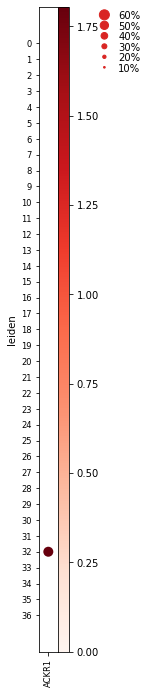

There are 4 genes in  Atipical_chemokine_receptor_add
There are 4 Atipical_chemokine_receptor_add in common with Rectum


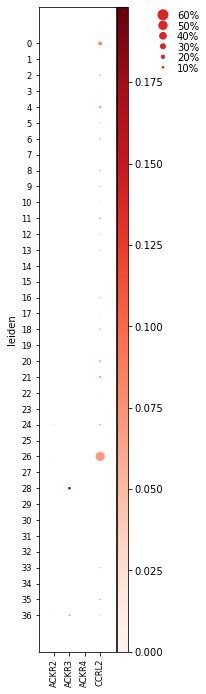

There are 10 genes in  Chemokine_receptor CCR_add
There are 8 Chemokine_receptor CCR_add in common with Rectum


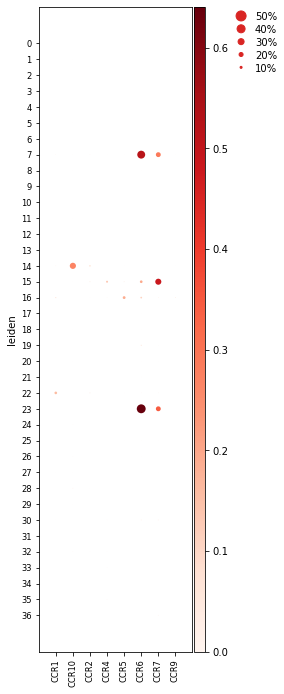

There are 6 genes in  Chemokine_receptor CXCR_add
There are 6 Chemokine_receptor CXCR_add in common with Rectum


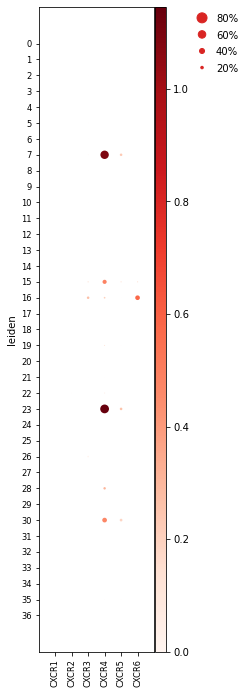

There are 1 genes in  Chemokine_receptor XC_add
There are 1 Chemokine_receptor XC_add in common with Rectum


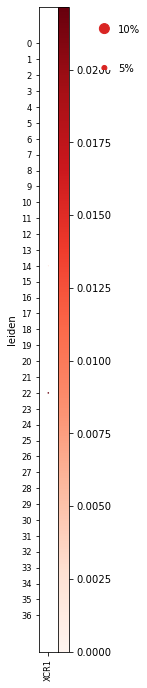

There are 1 genes in  Chemokine_receptor_CX3CR1_add
There are 1 Chemokine_receptor_CX3CR1_add in common with Rectum


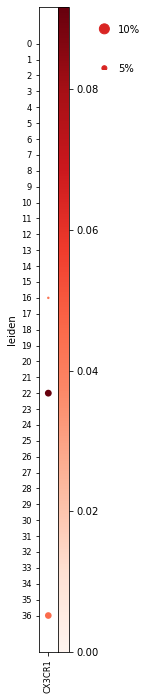

There are 3 genes in  Chemokine_receptor_add
There are 3 Chemokine_receptor_add in common with Rectum


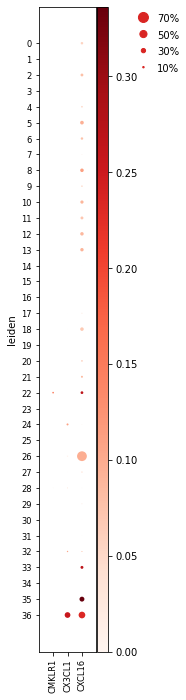

There are 15 genes in  Cytokine_receptor
There are 15 Cytokine_receptor in common with Rectum


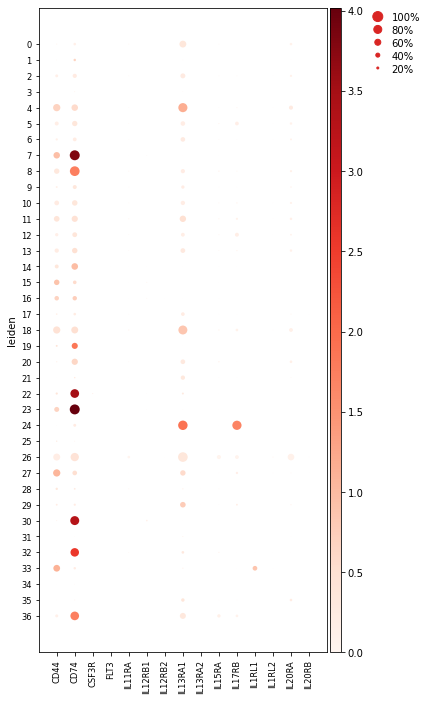

There are 31 genes in  Cytokine_receptor_add
There are 31 Cytokine_receptor_add in common with Rectum


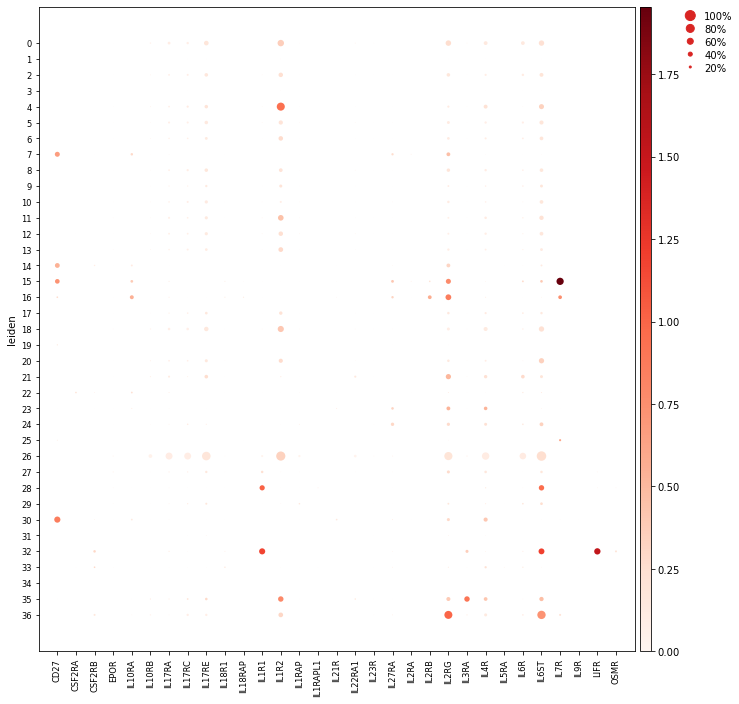

There are 1 genes in  Cytokine_receptor_add IL6 family
There are 1 Cytokine_receptor_add IL6 family in common with Rectum


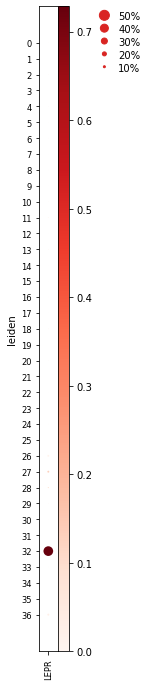

There are 1 genes in  Estrogen_receptor_add
There are 1 Estrogen_receptor_add in common with Rectum


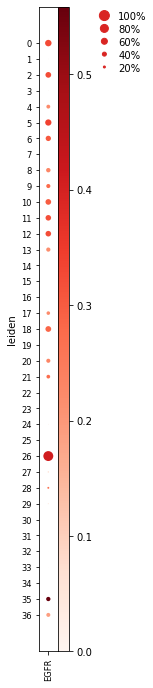

There are 7 genes in  HLA
There are 7 HLA in common with Rectum


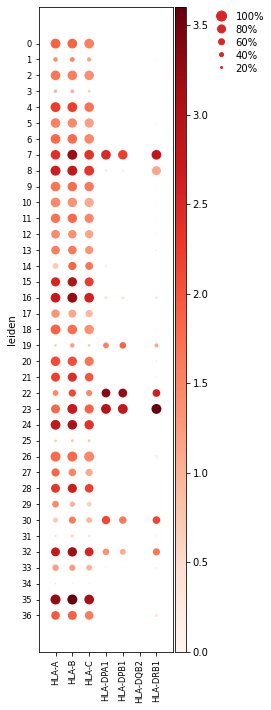

There are 2 genes in  Hormone_receptor_add
There are 2 Hormone_receptor_add in common with Rectum


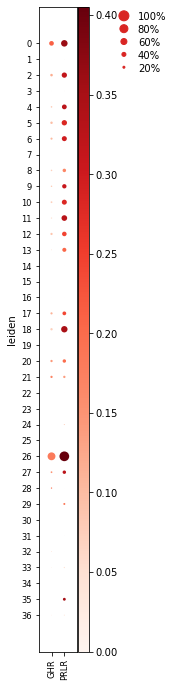

There are 1 genes in  Inflammation
There are 1 Inflammation in common with Rectum


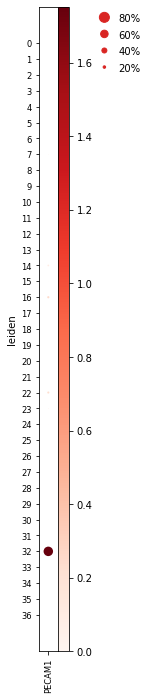

There are 15 genes in  Inhibitory LILRs_add
There are 15 Inhibitory LILRs_add in common with Rectum


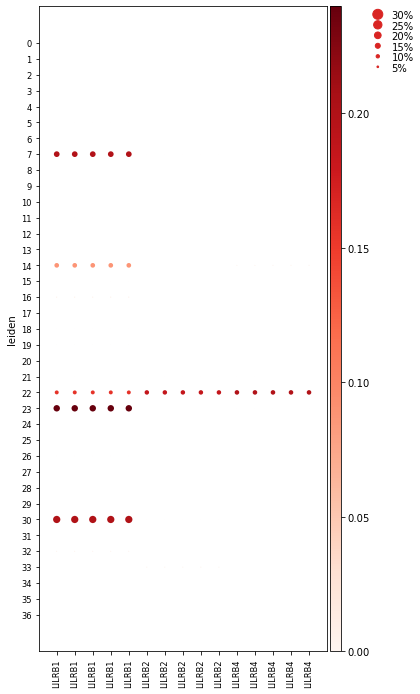

There are 1 genes in  Interferon_receptor
There are 1 Interferon_receptor in common with Rectum


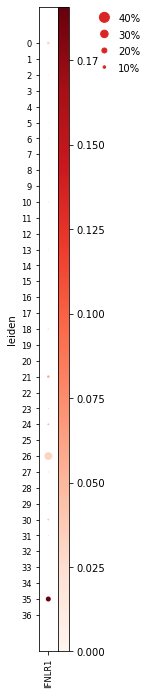

There are 5 genes in  Interferon_receptor_add
There are 5 Interferon_receptor_add in common with Rectum


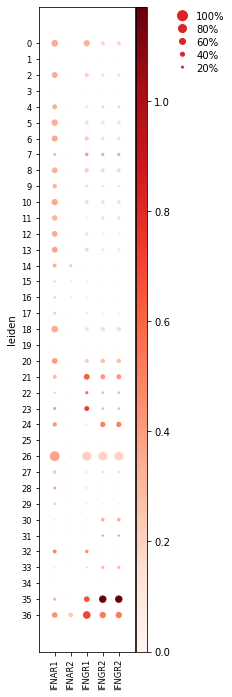

There are 147 genes in  KIR_add
There are 140 KIR_add in common with Rectum


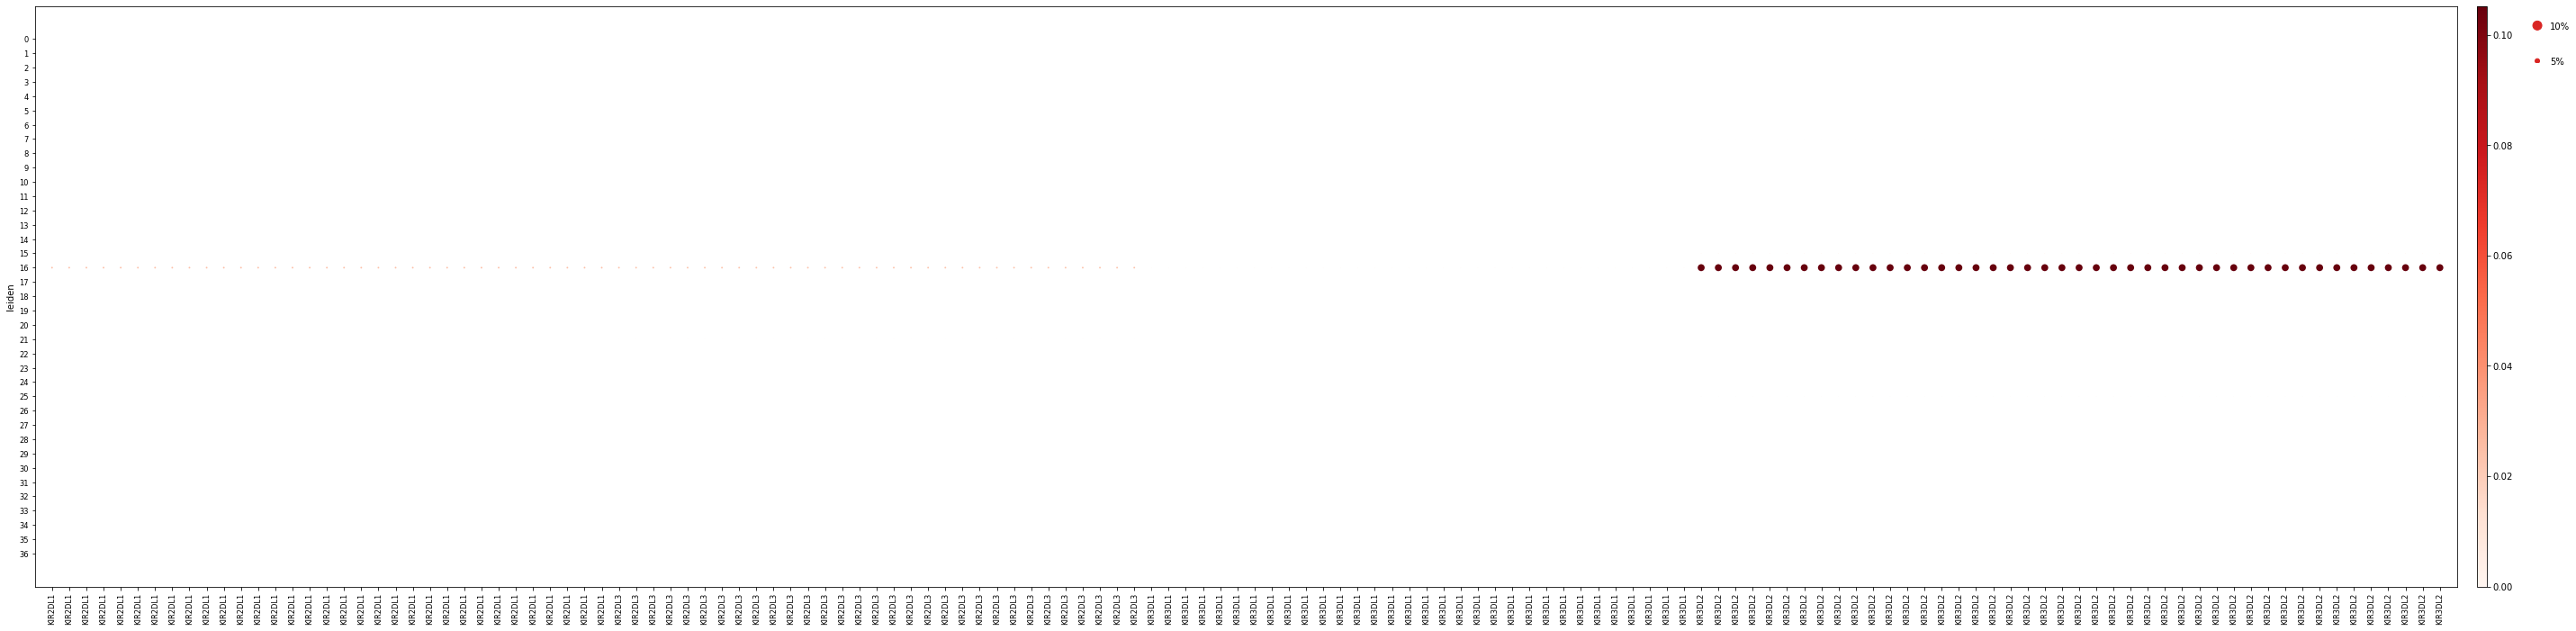

There are 10 genes in  KLR_add
There are 10 KLR_add in common with Rectum


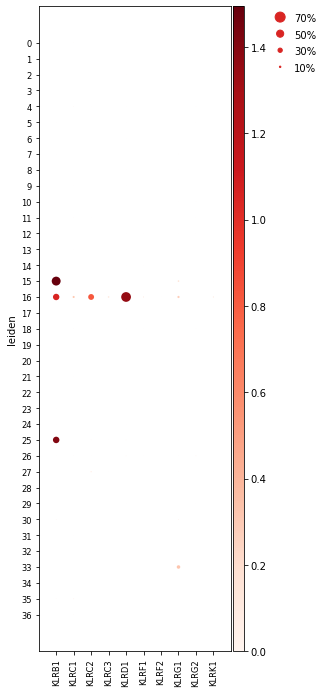

There are 5 genes in  TGFBeta_receptor_add
There are 5 TGFBeta_receptor_add in common with Rectum


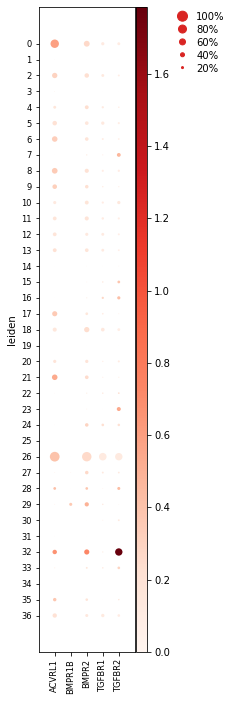

There are 24 genes in  TNF_receptor_add
There are 24 TNF_receptor_add in common with Rectum


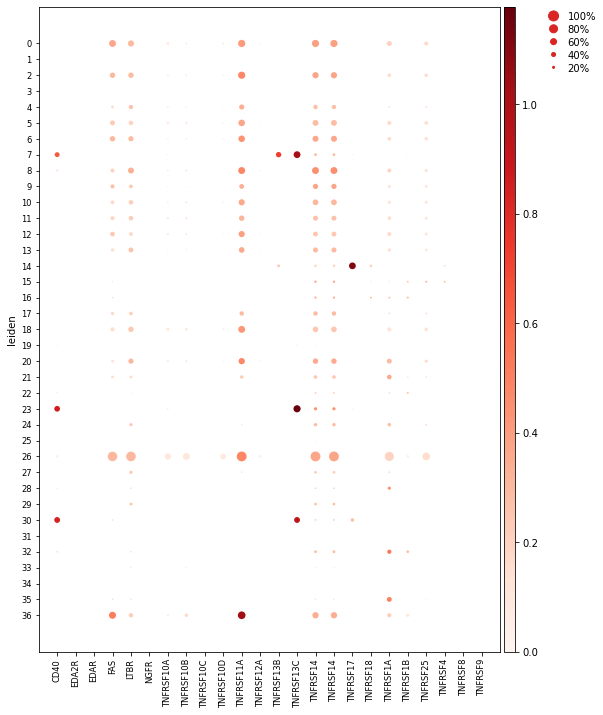

There are 1 genes in  cytokine_receptor_add
There are 1 cytokine_receptor_add in common with Rectum


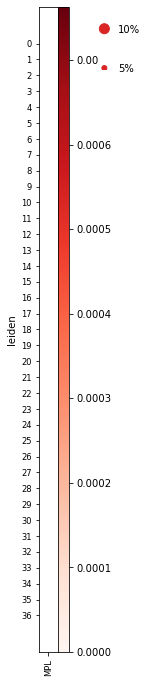

There are 1 genes in  growth factor receptor
There are 1 growth factor receptor in common with Rectum


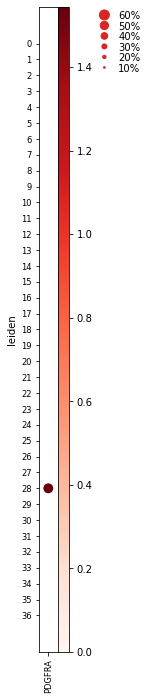

In [186]:
#Loop through the groups to generate dotplots

for index, row in receptor_groups.iterrows():
    
    genes = gene_input[gene_input['uniprot'].isin(protein_input.loc[protein_input['receptor_desc'] == index]['uniprot'])]['gene_name']
    genes = pd.DataFrame(data= genes, columns = ['gene_name'])
    genes_common = genes[genes['gene_name'].isin(adata.var_names)]['gene_name']

    print('There are', genes.shape[0], 'genes in ', index)
    print('There are', genes_common.shape[0], index, 'in common with Rectum')
    
    if genes_common.shape[0] == 0:
        continue
        
    sc.pl.dotplot(adata, genes_common, groupby='leiden')